In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor

# Define molecules
m_max_fcfp4 = "[H]c1c([H])c(OC([H])([H])C(=O)N([H])c2c([H])c([H])c(C([H])([H])N3C([H])([H])C([H])([H])C([H])([H])C([H])([H])C3([H])[H])c([H])c2[H])c(Cl)c([H])c1Cl"
mol_fcfp4 = Chem.MolFromSmiles(m_max_fcfp4)

m_max_ecfp4 = "[H]c1c([H])c(OC([H])([H])C([H])([H])C([H])([H])C([H])([H])N2C([H])([H])C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c2c(c1[H])C(=O)N([H])C([H])([H])C2([H])[H]"
mol_ecfp4 = Chem.MolFromSmiles(m_max_ecfp4)

aripiprazole = Chem.MolFromSmiles("C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=CC=C4)Cl)Cl")

# Ensure consistent 2D coordinates and align to the reference template
rdDepictor.SetPreferCoordGen(True)
for m in (mol_ecfp4, mol_fcfp4, aripiprazole):
    rdDepictor.Compute2DCoords(m)

# Use aripiprazole as a 2D template to standardize orientation
rdDepictor.GenerateDepictionMatching2DStructure(mol_ecfp4, aripiprazole)
rdDepictor.GenerateDepictionMatching2DStructure(mol_fcfp4, aripiprazole)

# Create grid with labels
legends = [
    "Max ECFP4 - 0.354 - PDB: 4TK0 ",
    "Max FCFP4 - 0.517 - PDB: 5FOQ ", 
    "Aripiprazole - Reference - 7E2Z"
]

img_bytes = Draw.MolsToGridImage(
    [mol_ecfp4, mol_fcfp4, aripiprazole],
    legends=legends,
    molsPerRow=3,
    subImgSize=(400, 400),
    useSVG=False,
    returnPNG=True
)

with open('molecular_comparison_grid.png', 'wb') as f:
    f.write(img_bytes)

print("High-quality PNG grid created: molecular_comparison_grid.png")


<Axes: title={'center': 'Reward Mean over Epochs'}, xlabel='Epoch', ylabel='Reward Mean'>

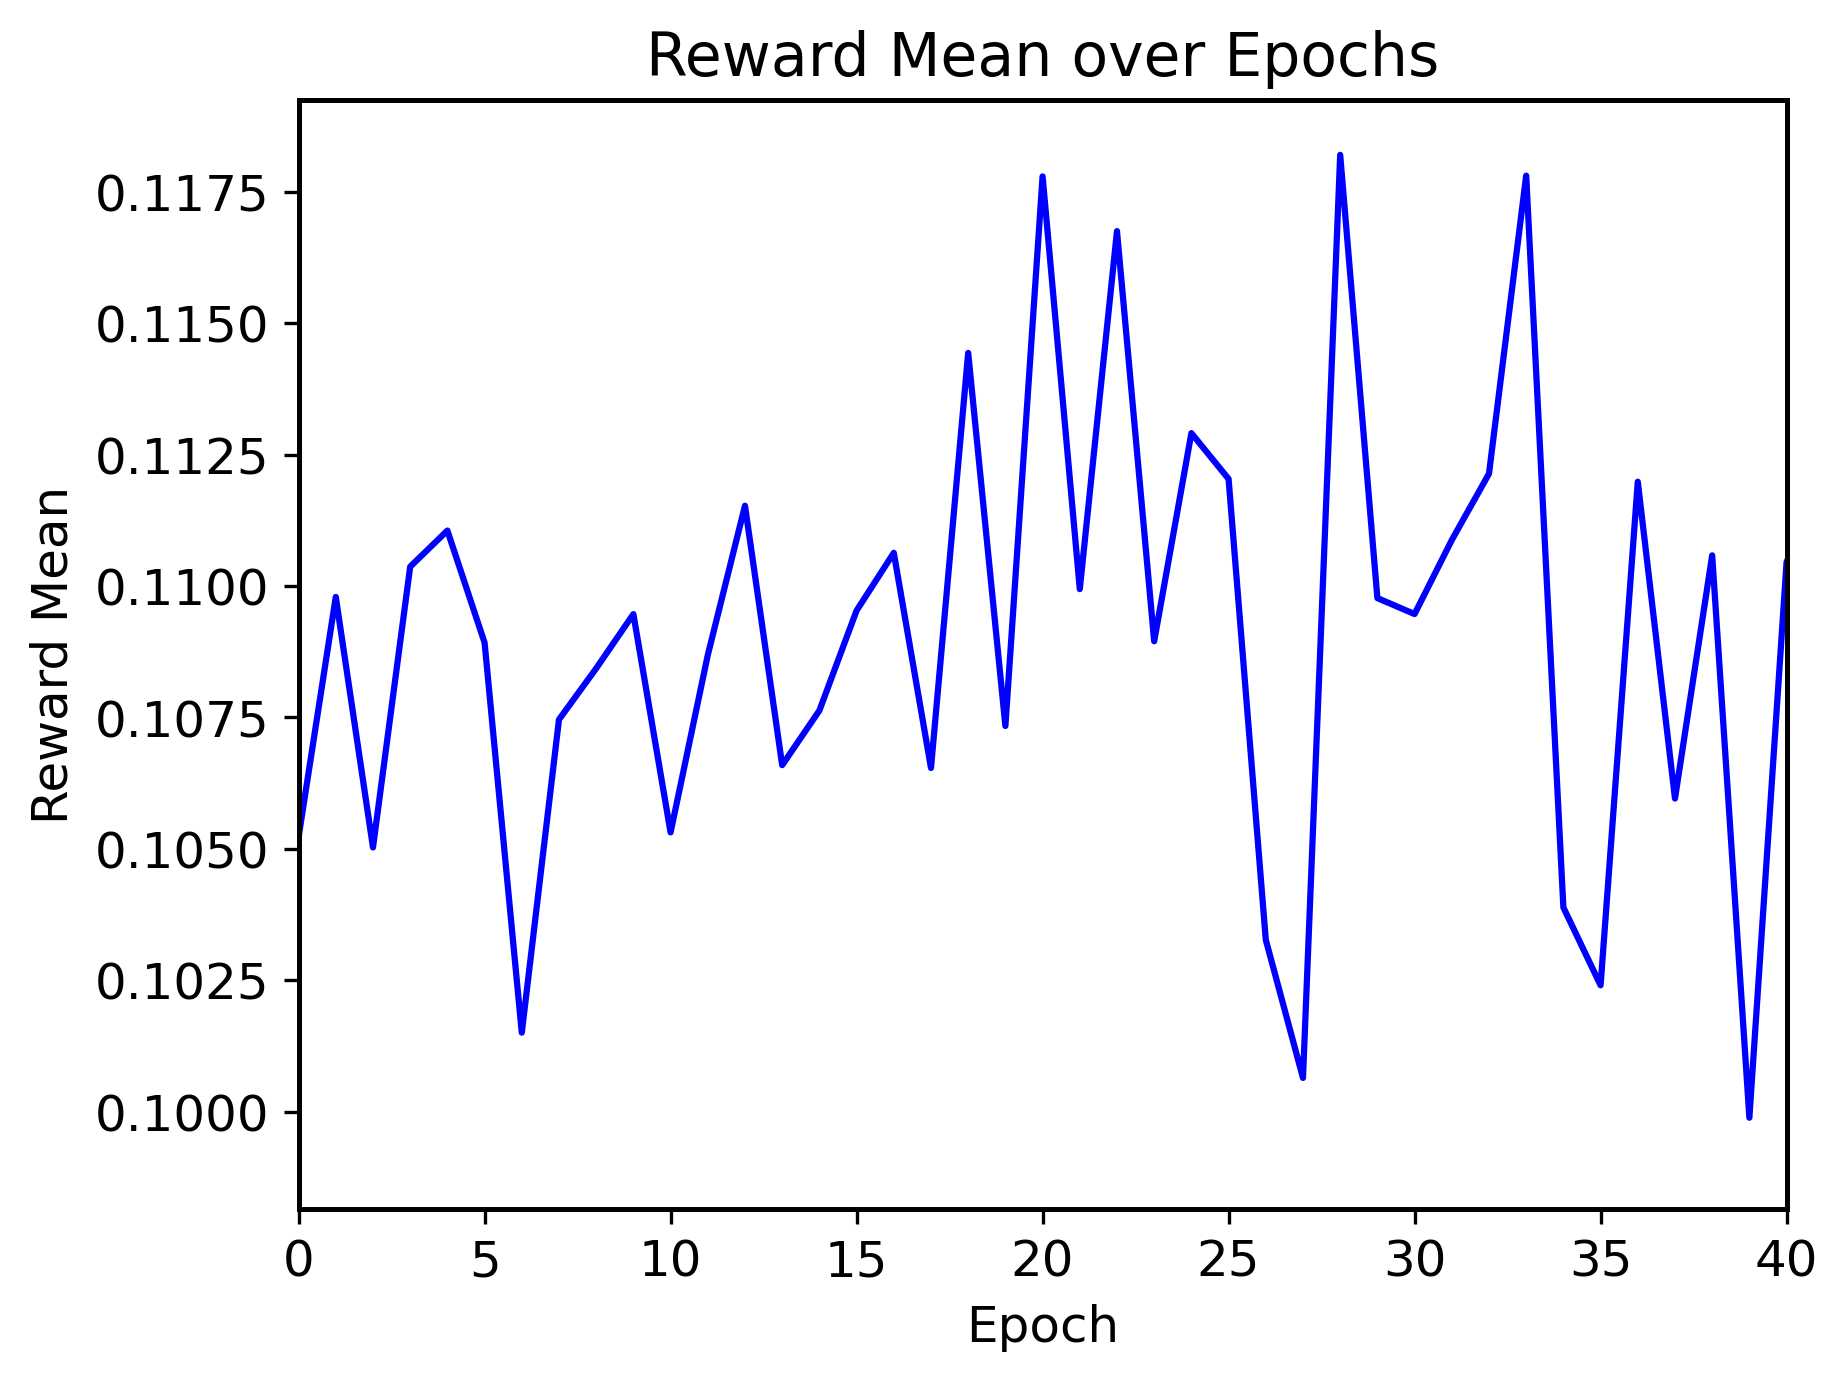

In [36]:
import pandas as pd
from matplotlib.pyplot import plot as plt

csv = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_28_55.401+01_00_ecfp4_mean.csv"

df = pd.read_csv(csv)

df.plot(x="epoch", y="ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_mean_epoch", 
        kind="line", 
        xlim=(0, 40), 
        legend=False,
        color="blue",
        xlabel="Epoch",
        ylabel="Reward Mean",
        title="Reward Mean over Epochs")

<Axes: title={'center': 'Maximum Reward Similarity over Epochs'}, xlabel='Epoch', ylabel='Maximum Reward Similarity to Aripiprazole'>

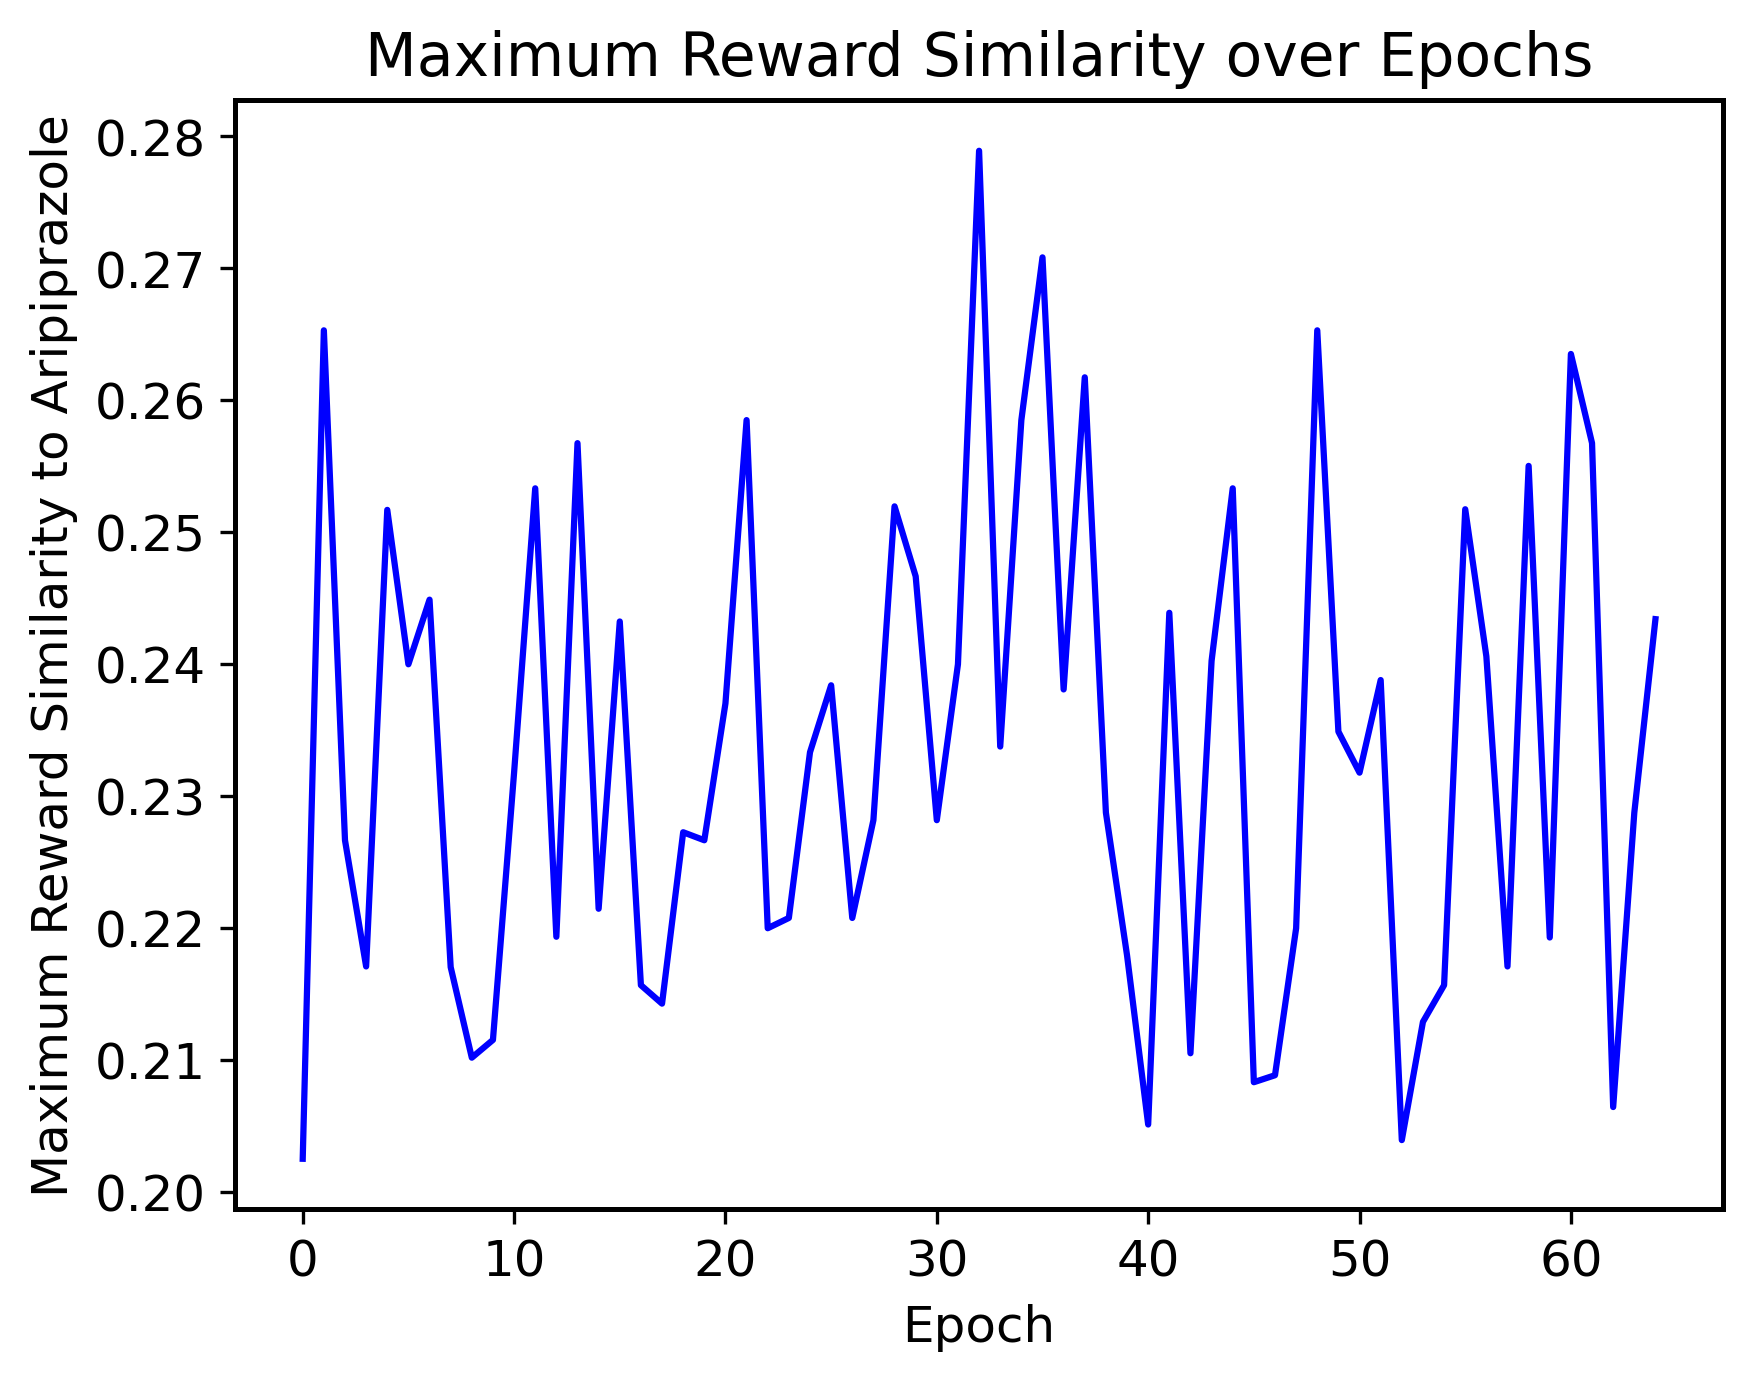

In [38]:
import pandas as pd
from matplotlib.pyplot import plot as plt 


csv = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_22_40.854+01_00_ecfp4.csv"

df = pd.read_csv(csv)

df.plot(x="epoch",
        y="ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_max_epoch",
        kind="line",
        color="blue",
        legend=False,
        xlabel="Epoch",
        ylabel="Maximum Reward Similarity to Aripiprazole",
        title="Maximum Reward Similarity over Epochs")


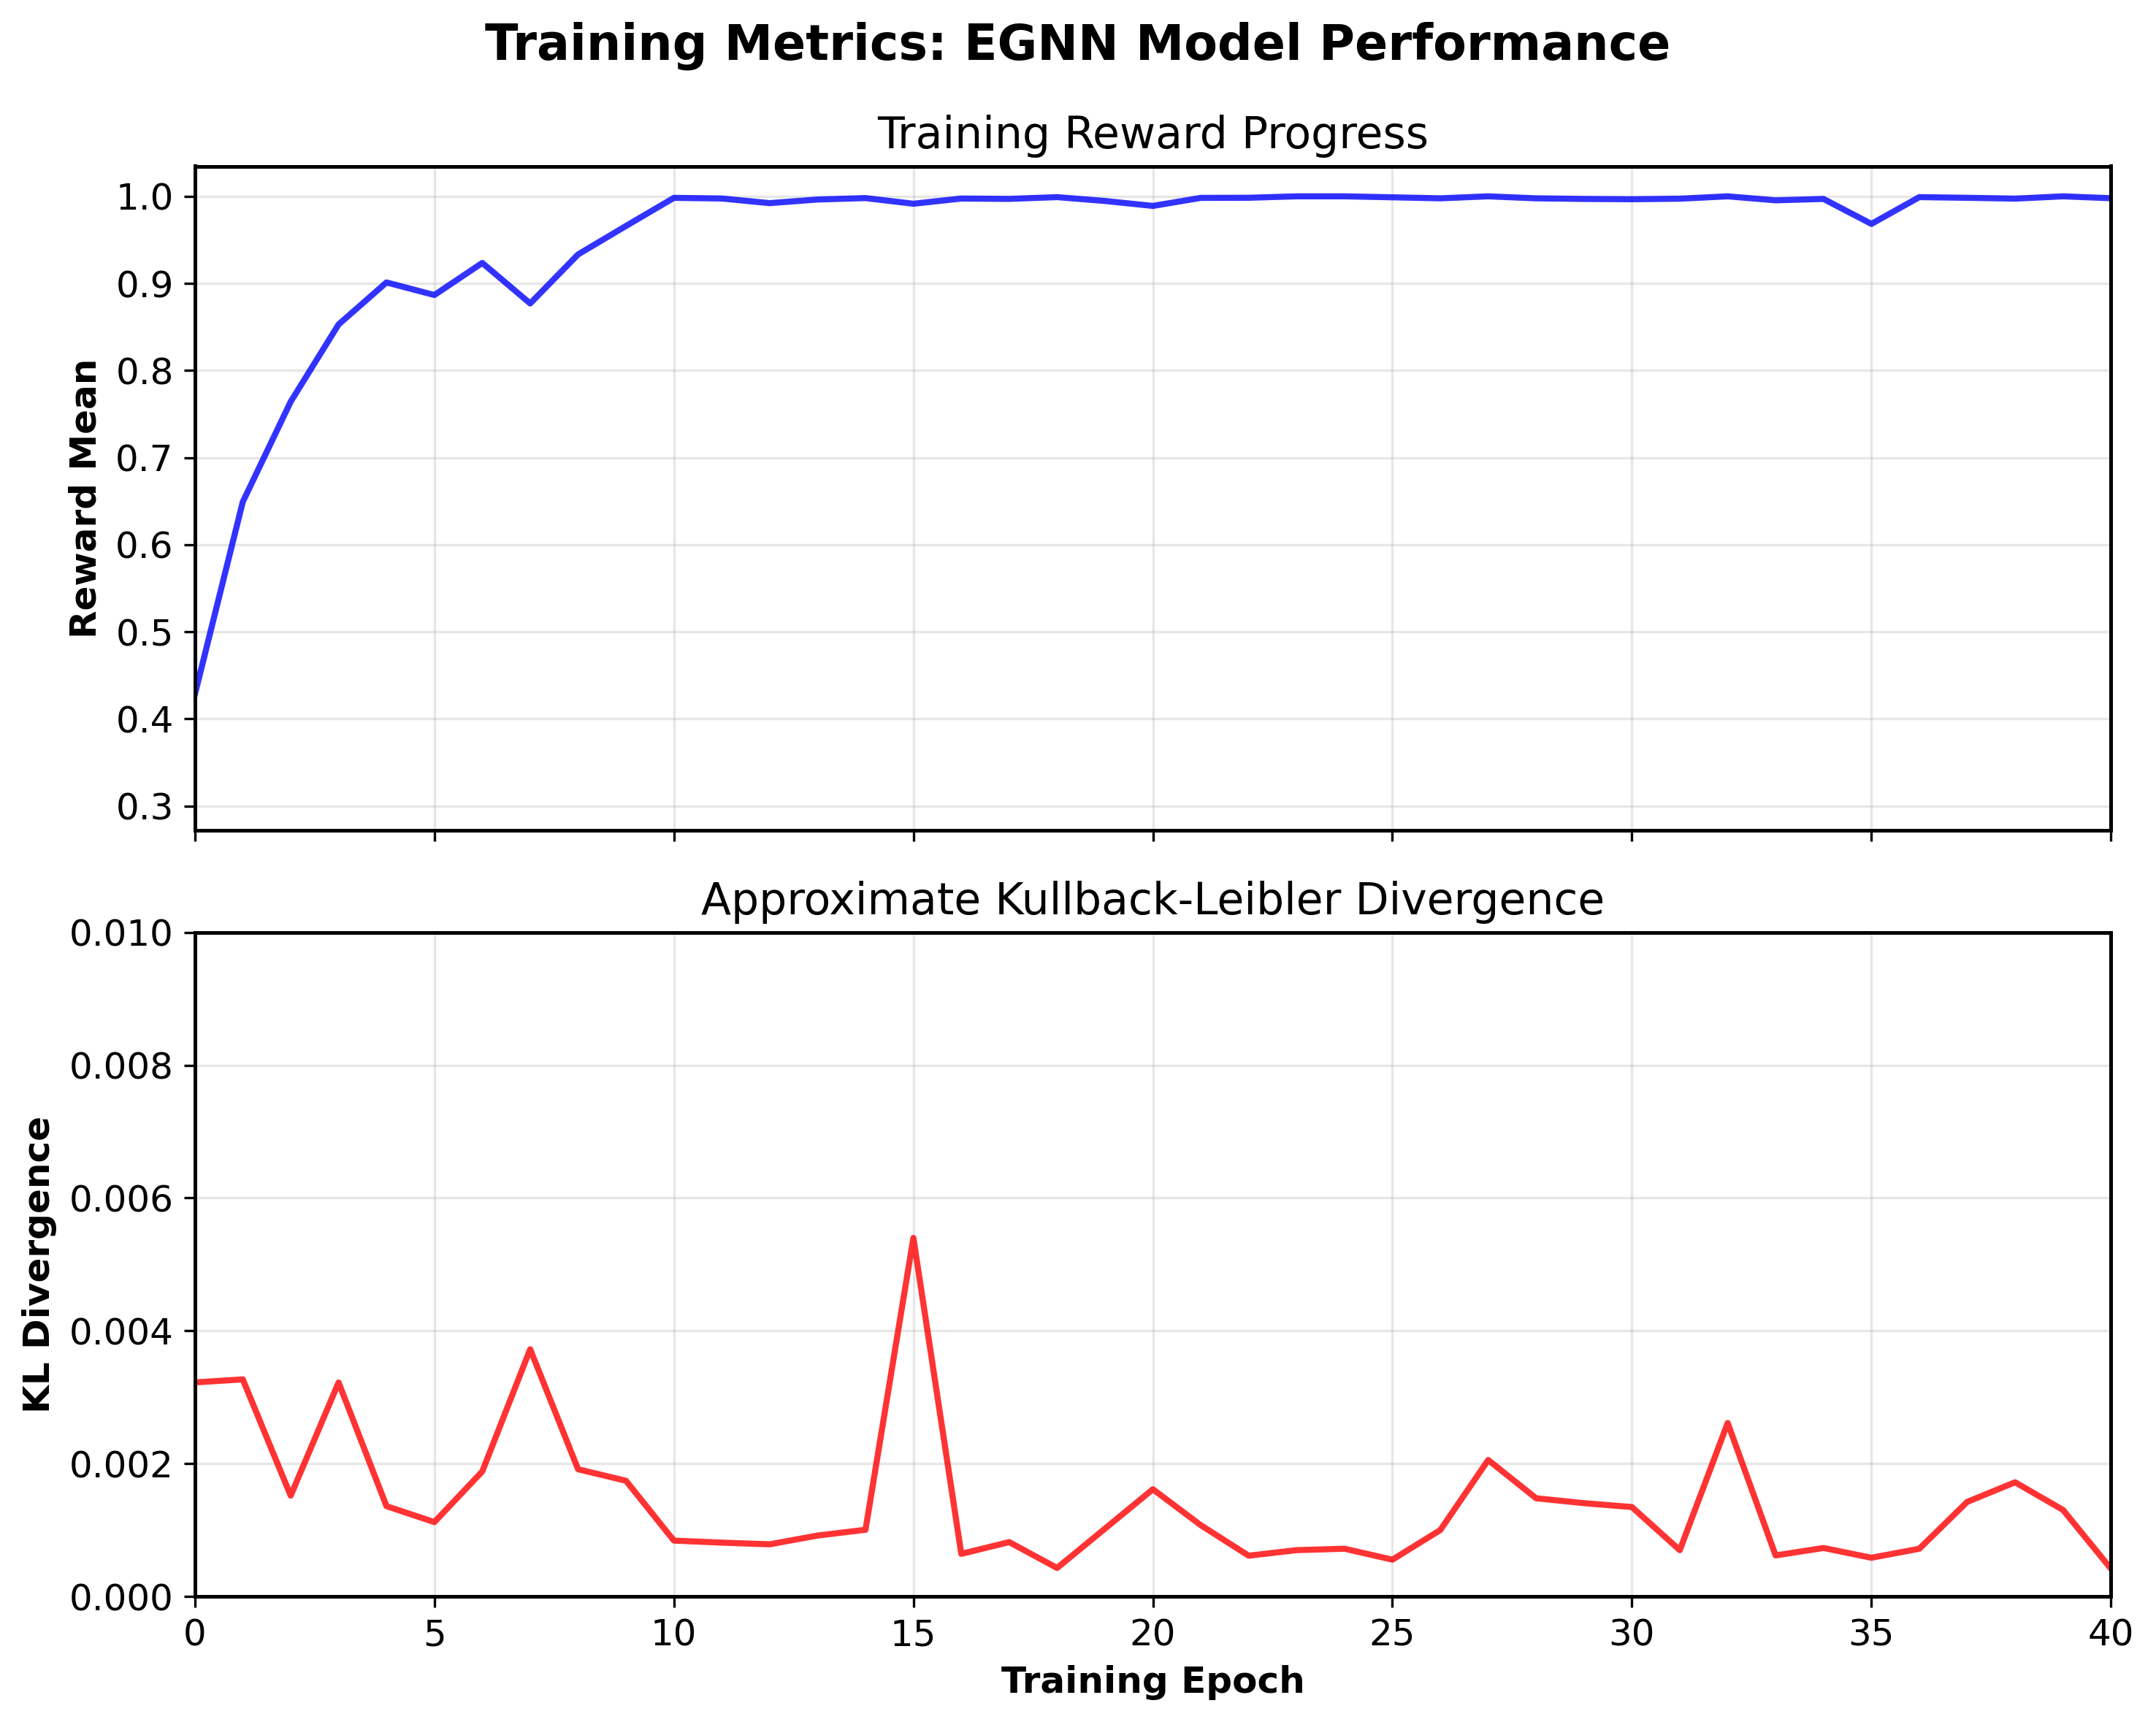

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Set high-quality figure parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

def load_and_plot_training_metrics():
    """
    Load training data and create a high-quality subplot showing reward mean 
    and KL divergence over training epochs.
    
    Returns:
        matplotlib.figure.Figure: The created figure object
    """
    # Load data
    reward_csv = "data/egnn_3_4_oxygen_test_lr_1e-3_clip_0.1_entropy_0.001/reward_mean_over_epochs.csv"
    kl_csv = "data/egnn_3_4_oxygen_test_lr_1e-3_clip_0.1_entropy_0.001/wandb_export_2025-09-14T15_35_37.710+01_00.csv"
    
    reward_df = pd.read_csv(reward_csv)
    kl_df = pd.read_csv(kl_csv)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.suptitle('Training Metrics: EGNN Model Performance', fontsize=16, fontweight='bold')
    
    # Plot reward mean
    ax1.plot(reward_df["trainer/global_step"], 
             reward_df["egnn_3_4_oxygen_test_lr_1e-3_clip_0.1_entropy_0.001_seed_123 - train/reward_mean"],
             color='blue', linewidth=2, alpha=0.8)
    ax1.set_ylabel('Reward Mean', fontweight='bold')
    ax1.set_title('Training Reward Progress')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 40)
    
    # Plot KL divergence  
    ax2.plot(kl_df["trainer/global_step"],
             kl_df["egnn_3_4_oxygen_test_lr_1e-3_clip_0.1_entropy_0.001_seed_123 - train/approx_kl_epoch"],
             color='red', linewidth=2, alpha=0.8)
    ax2.set_xlabel('Training Epoch', fontweight='bold')
    ax2.set_ylabel('KL Divergence', fontweight='bold')
    ax2.set_title('Approximate Kullback-Leibler Divergence')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, 40)
    ax2.set_ylim(0, 0.01)
    
    plt.tight_layout()
    return fig

# Create and display the plot
fig = load_and_plot_training_metrics()
plt.show()

# Optional: Save high-quality version
# fig.savefig('training_metrics.png', dpi=300, bbox_inches='tight')

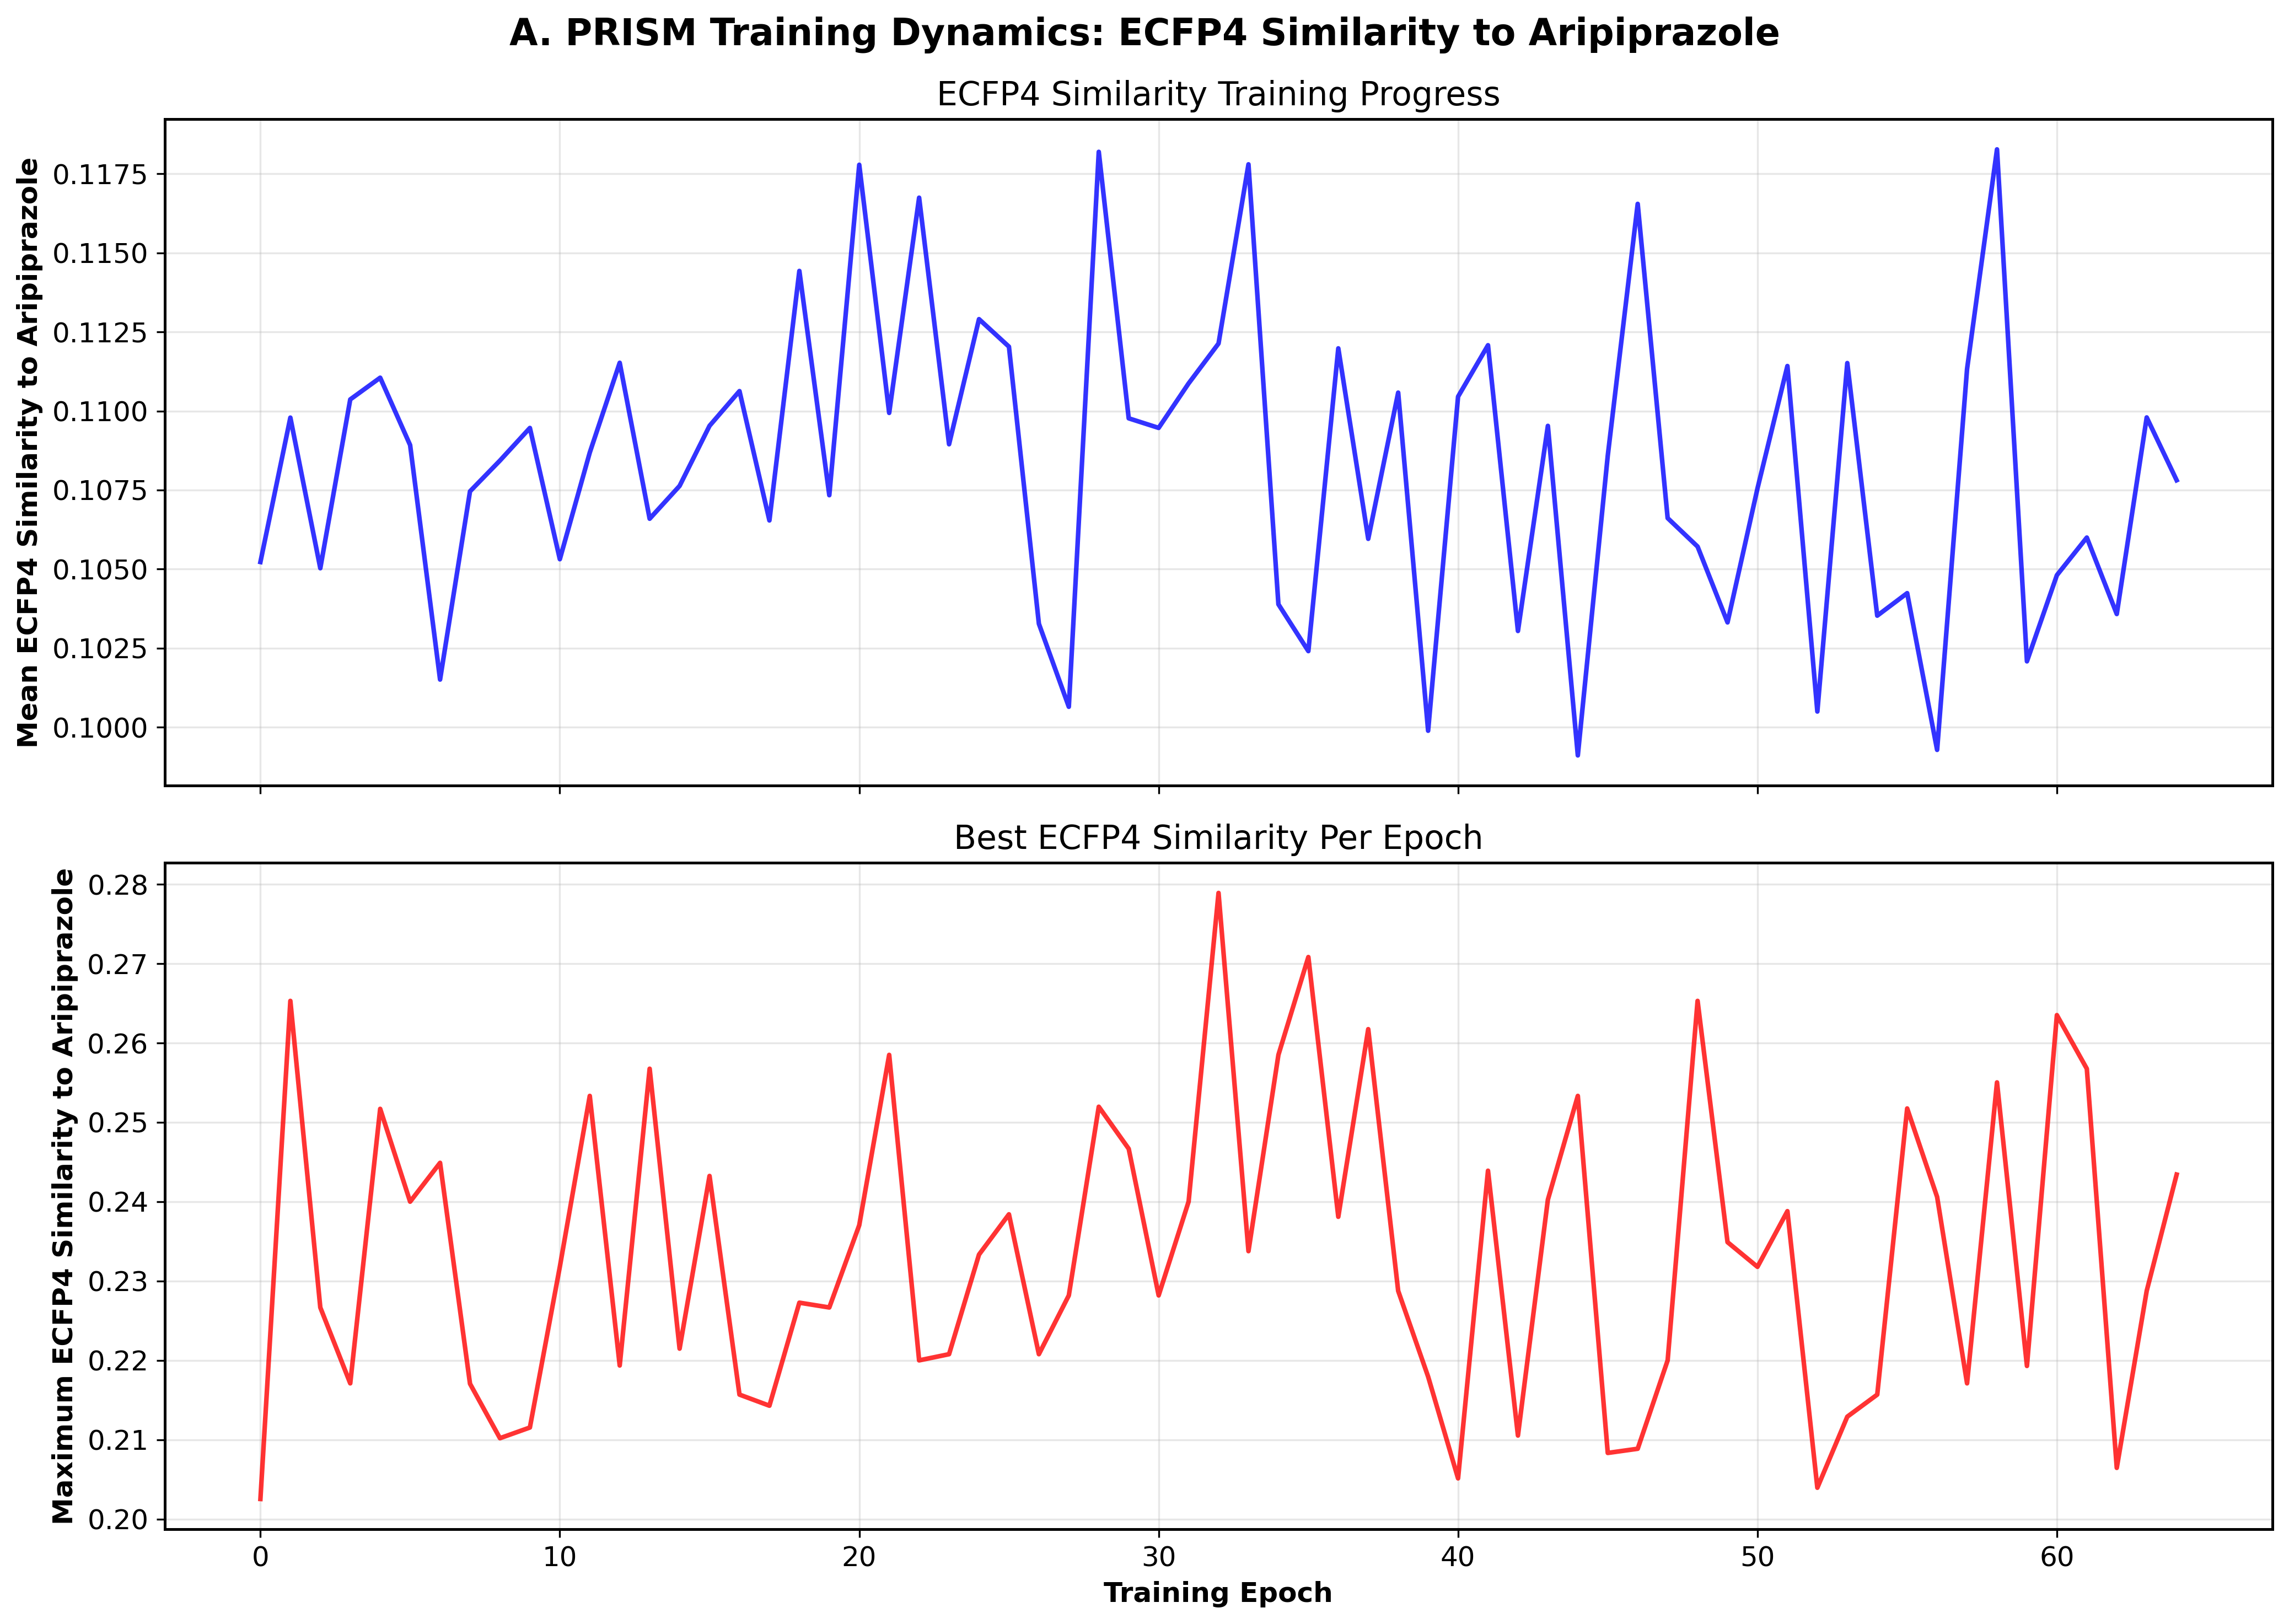

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Set high-quality figure parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

def load_and_plot_training_metrics():
    """
    Load training data and create a high-quality subplot showing reward mean 
    and KL divergence over training epochs.
    
    Returns:
        matplotlib.figure.Figure: The created figure object
    """
    # Load data
    reward_mean = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_28_55.401+01_00_ecfp4_mean.csv"
    max_reward_csv = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_22_40.854+01_00_ecfp4.csv"

    
    reward_mean_df = pd.read_csv(reward_mean)
    max_reward_df = pd.read_csv(max_reward_csv)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.suptitle('A. PRISM Training Dynamics: ECFP4 Similarity to Aripiprazole', fontsize=16, fontweight='bold')
    
    # Plot reward mean
    ax1.plot(reward_mean_df["epoch"], 
             reward_mean_df["ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_mean_epoch"],
             color='blue', linewidth=2, alpha=0.8)
    ax1.set_ylabel('Mean ECFP4 Similarity to Aripiprazole', fontweight='bold')
    ax1.set_title('ECFP4 Similarity Training Progress')
    ax1.grid(True, alpha=0.3)
    
    # Plot max divergence  
    ax2.plot(max_reward_df["epoch"],
             max_reward_df["ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_max_epoch"],
             color='red', linewidth=2, alpha=0.8)
    ax2.set_xlabel('Training Epoch', fontweight='bold')
    ax2.set_ylabel('Maximum ECFP4 Similarity to Aripiprazole', fontweight='bold')
    ax2.set_title('Best ECFP4 Similarity Per Epoch')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Create and display the plot
fig = load_and_plot_training_metrics()
plt.show()

# Optional: Save high-quality version
fig.savefig('data/aripiprazole_similarity/training_metrics_ecfp4.png', dpi=300, bbox_inches='tight')

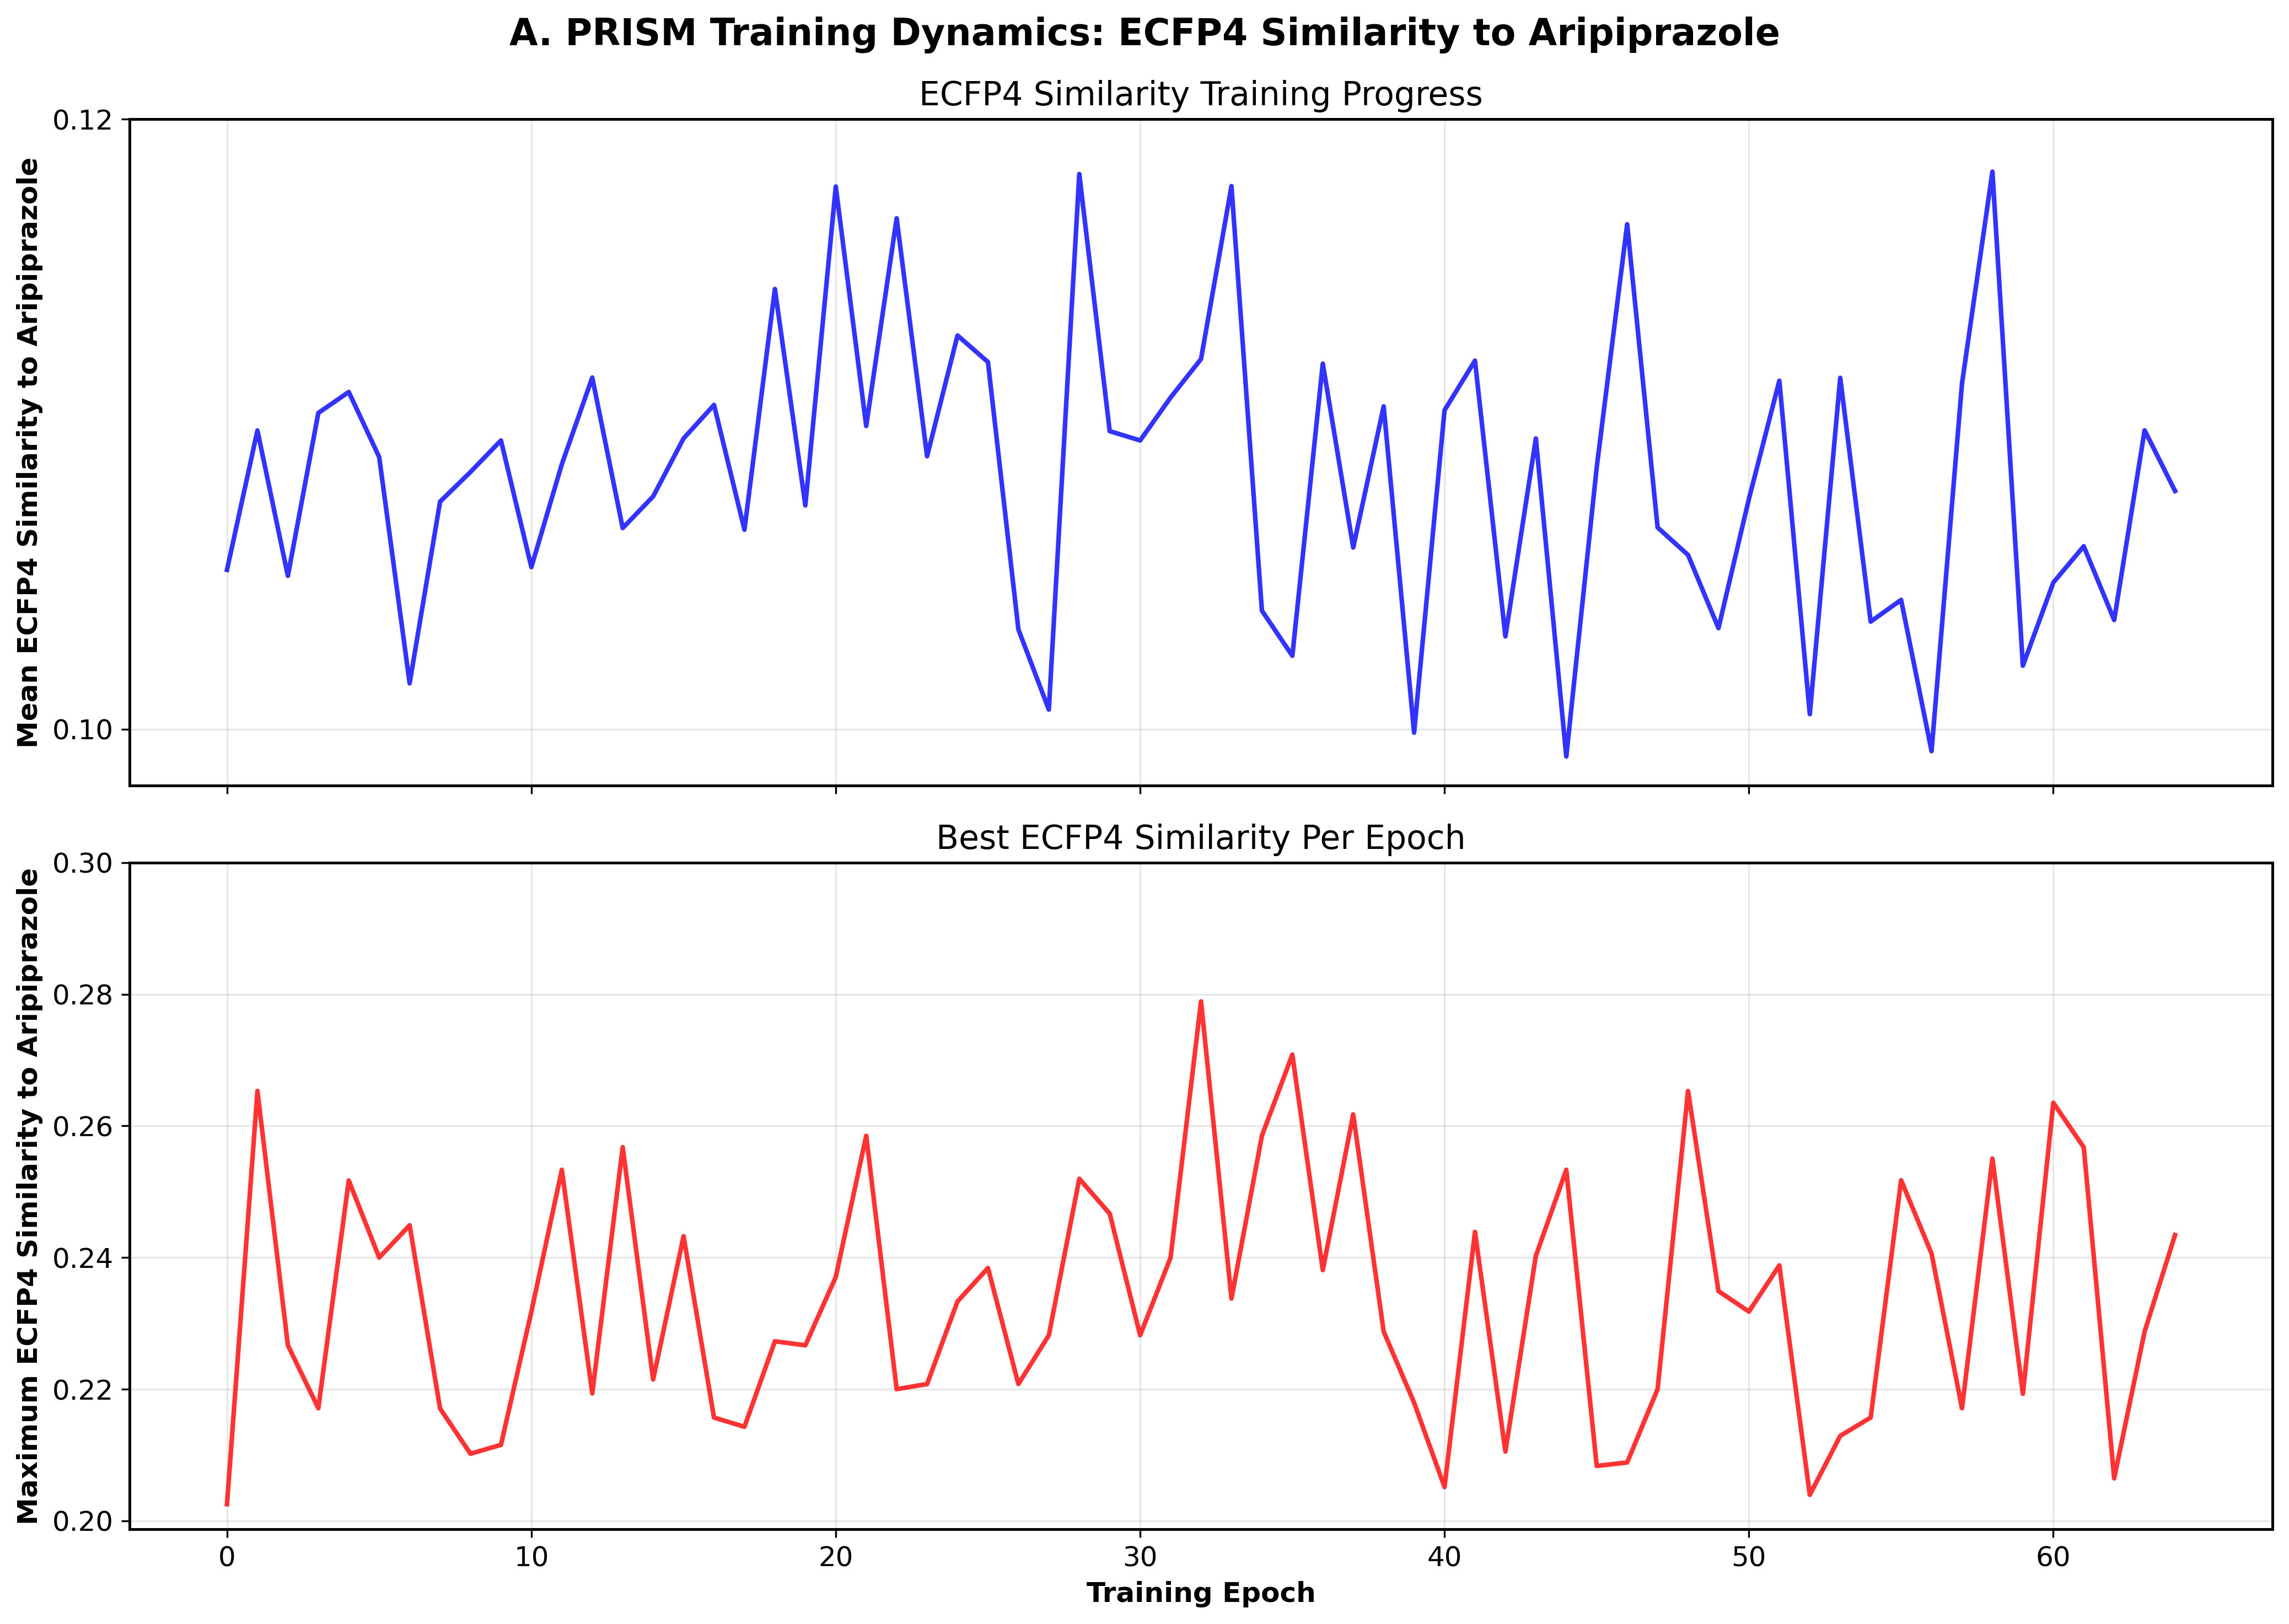

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set high-quality figure parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

def load_and_plot_training_metrics():
    """
    Load training data and create a high-quality subplot showing reward mean 
    and KL divergence over training epochs.
    
    Returns:
        matplotlib.figure.Figure: The created figure object
    """
    # Load data
    reward_mean = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_28_55.401+01_00_ecfp4_mean.csv"
    max_reward_csv = "data/aripiprazole_similarity/wandb_export_2025-09-15T13_22_40.854+01_00_ecfp4.csv"

    
    reward_mean_df = pd.read_csv(reward_mean)
    max_reward_df = pd.read_csv(max_reward_csv)
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.suptitle('A. PRISM Training Dynamics: ECFP4 Similarity to Aripiprazole', fontsize=16, fontweight='bold')
    
    # Plot reward mean
    ax1.plot(reward_mean_df["epoch"], 
             reward_mean_df["ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_mean_epoch"],
             color='blue', linewidth=2, alpha=0.8)
    ax1.set_ylabel('Mean ECFP4 Similarity to Aripiprazole', fontweight='bold')
    ax1.set_title('ECFP4 Similarity Training Progress')
    ax1.grid(True, alpha=0.3)
    ax1.set_yticks(np.arange(0.1, ax1.get_ylim()[1] + 0.02, 0.02))
    
    # Plot max divergence  
    ax2.plot(max_reward_df["epoch"],
             max_reward_df["ari_sim_identical_lr_1e-6_clip_0.1_seed_123 - train/reward_max_epoch"],
             color='red', linewidth=2, alpha=0.8)
    ax2.set_xlabel('Training Epoch', fontweight='bold')
    ax2.set_ylabel('Maximum ECFP4 Similarity to Aripiprazole', fontweight='bold')
    ax2.set_title('Best ECFP4 Similarity Per Epoch')
    ax2.grid(True, alpha=0.3)
    ax2.set_yticks(np.arange(0.2, ax2.get_ylim()[1] + 0.02, 0.02))
    
    plt.tight_layout()
    return fig

# Create and display the plot
fig = load_and_plot_training_metrics()
plt.show()

# Optional: Save high-quality version
fig.savefig('data/aripiprazole_similarity/training_metrics_ecfp4.png', dpi=300, bbox_inches='tight')

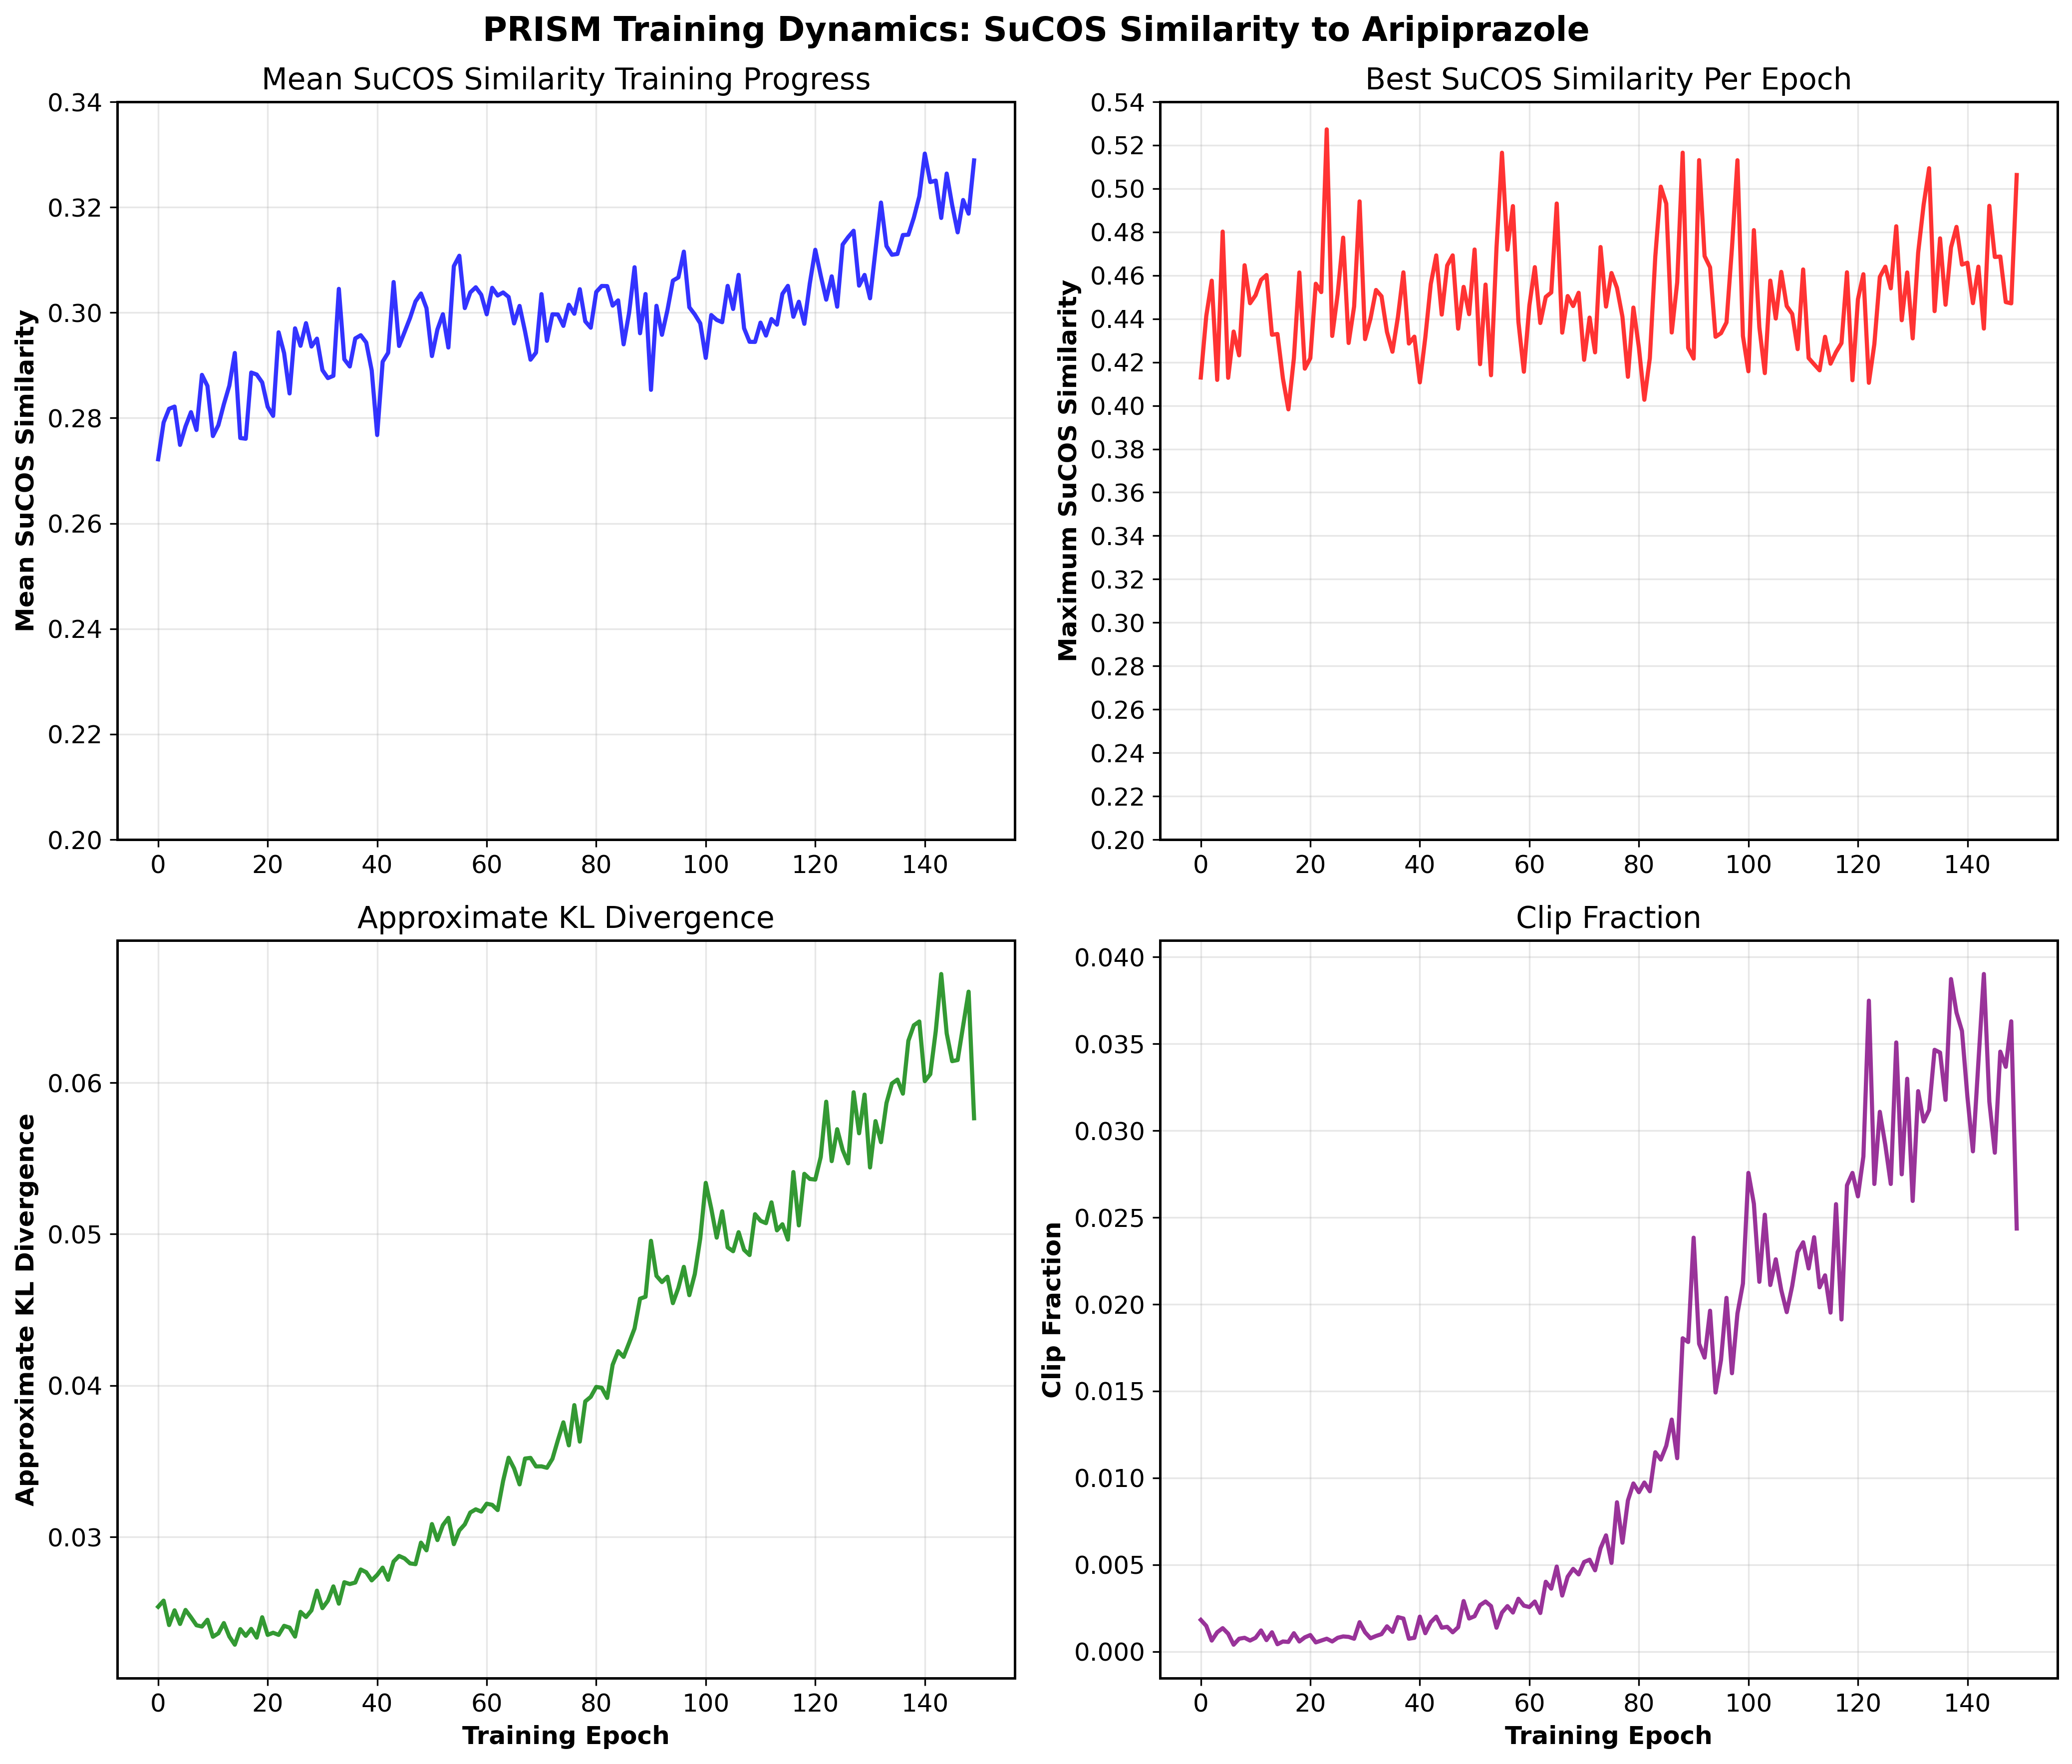

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set high-quality figure parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

def load_and_plot_training_metrics():
    """
    Load training data and create a high-quality subplot showing reward mean 
    and KL divergence over training epochs.
    
    Returns:
        matplotlib.figure.Figure: The created figure object
    """
    # Load data
    reward_mean = "data/aripiprazole_similarity/sucos_sim_wandb/wandb_export_2025-09-15T17_24_50.727+01_00_raw_Score_mean.csv"
    max_reward_csv = "data/aripiprazole_similarity/sucos_sim_wandb/wandb_export_2025-09-15T17_24_59.789+01_00_raw_score_max.csv"
    approx_kl_csv = "data/aripiprazole_similarity/sucos_sim_wandb/wandb_export_2025-09-15T17_25_45.389+01_00_kl.csv"
    approx_clip_csv = "data/aripiprazole_similarity/sucos_sim_wandb/wandb_export_2025-09-15T17_25_38.860+01_00_clip.csv"
    
    reward_mean_df = pd.read_csv(reward_mean)
    max_reward_df = pd.read_csv(max_reward_csv)
    approx_kl_df = pd.read_csv(approx_kl_csv)
    approx_clip_df = pd.read_csv(approx_clip_csv)
    
    # Create figure with 2x2 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('PRISM Training Dynamics: SuCOS Similarity to Aripiprazole', fontsize=16, fontweight='bold')
    
    # Plot reward mean
    ax1.plot(reward_mean_df["epoch"], 
             reward_mean_df["SuCOS_lr_1e-5_clip_0.1_centered_rewards_seed_123 - train/raw_score_mean_epoch"],
             color='blue', linewidth=2, alpha=0.8)
    ax1.set_ylabel('Mean SuCOS Similarity', fontweight='bold')
    ax1.set_title('Mean SuCOS Similarity Training Progress')
    ax1.grid(True, alpha=0.3)
    ax1.set_yticks(np.arange(0.2, ax1.get_ylim()[1] + 0.02, 0.02))
    
    # Plot max reward  
    ax2.plot(max_reward_df["epoch"],
             max_reward_df["SuCOS_lr_1e-5_clip_0.1_centered_rewards_seed_123 - train/raw_score_max_epoch"],
             color='red', linewidth=2, alpha=0.8)
    ax2.set_ylabel('Maximum SuCOS Similarity', fontweight='bold')
    ax2.set_title('Best SuCOS Similarity Per Epoch')
    ax2.grid(True, alpha=0.3)
    ax2.set_yticks(np.arange(0.2, ax2.get_ylim()[1] + 0.02, 0.02))
    
    # Plot KL divergence
    ax3.plot(approx_kl_df["epoch"],
             approx_kl_df["SuCOS_lr_1e-5_clip_0.1_centered_rewards_seed_123 - train/approx_kl_epoch"],
             color='green', linewidth=2, alpha=0.8)
    ax3.set_xlabel('Training Epoch', fontweight='bold')
    ax3.set_ylabel('Approximate KL Divergence', fontweight='bold')
    ax3.set_title('Approximate KL Divergence')
    ax3.grid(True, alpha=0.3)
    
    # Plot clip fraction
    ax4.plot(approx_clip_df["epoch"],
             approx_clip_df["SuCOS_lr_1e-5_clip_0.1_centered_rewards_seed_123 - train/clipfrac_epoch"],
             color='purple', linewidth=2, alpha=0.8)
    ax4.set_xlabel('Training Epoch', fontweight='bold')
    ax4.set_ylabel('Clip Fraction', fontweight='bold')
    ax4.set_title('Clip Fraction')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Create and display the plot
fig = load_and_plot_training_metrics()
plt.show()

# Optional: Save high-quality version
fig.savefig('data/aripiprazole_similarity/training_metrics_sucos.png', dpi=300, bbox_inches='tight')

Extracting atom types from baseline...
Extracting atom types from oxygen-optimized model...


[17:07:45] Explicit valence for atom # 19 N, 4, is greater than permitted
[17:07:45] ERROR: Could not sanitize molecule ending on line 3462
[17:07:45] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted


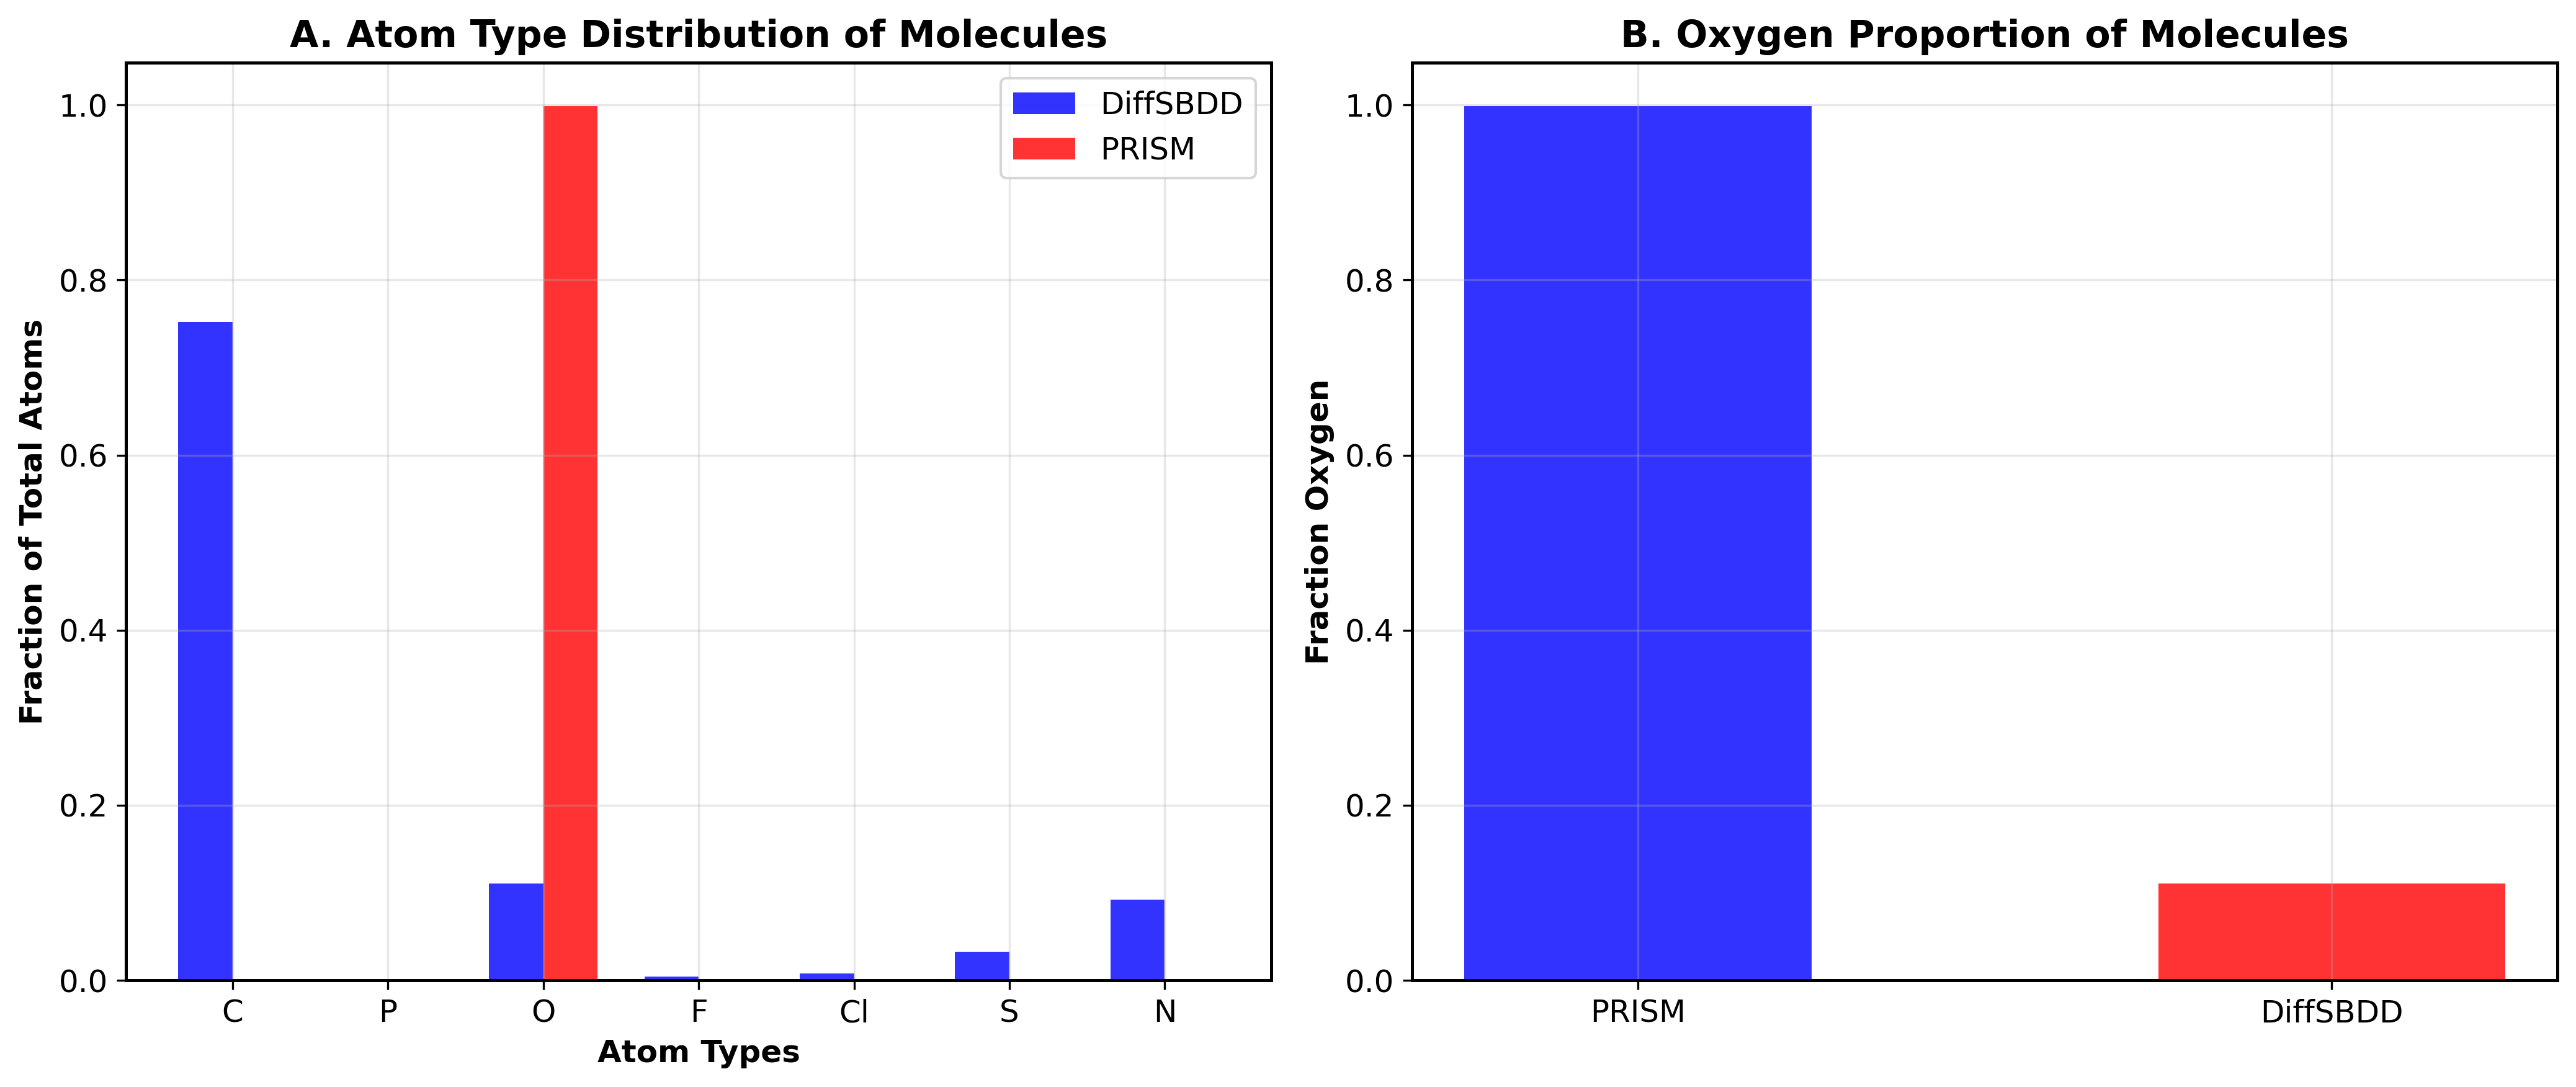


=== Oxygen Optimization Analysis ===
KL Divergence: 2.188160
Baseline oxygen content: 0.111 (11.1%)
Optimized oxygen content: 0.998 (99.8%)
Oxygen enrichment: 800.9%


In [34]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from scipy.stats import entropy
import matplotlib.pyplot as plt
from collections import Counter

def extract_atom_types_from_sdf(sdf_file):
    """
    Extract atom types from molecules in an SDF file.
    
    Args:
        sdf_file (str): Path to the SDF file
        
    Returns:
        list: List of atom symbols from all molecules
    """
    atom_types = []
    suppl = Chem.SDMolSupplier(sdf_file)
    
    for mol in suppl:
        if mol is not None:
            for atom in mol.GetAtoms():
                atom_types.append(atom.GetSymbol())
    
    return atom_types

def calculate_atom_type_distribution(atom_types):
    """
    Calculate probability distribution of atom types.
    
    Args:
        atom_types (list): List of atom symbols
        
    Returns:
        dict: Dictionary with atom types as keys and probabilities as values
    """
    counts = Counter(atom_types)
    total = sum(counts.values())
    
    return {atom: count/total for atom, count in counts.items()}

def calculate_kl_divergence(baseline_dist, model_dist):
    """
    Calculate KL divergence between two atom type distributions.
    
    Args:
        baseline_dist (dict): Baseline atom type distribution
        model_dist (dict): Model-generated atom type distribution
        
    Returns:
        float: KL divergence value
    """
    # Get all unique atom types
    all_atoms = set(list(baseline_dist.keys()) + list(model_dist.keys()))
    
    # Create probability arrays (add small epsilon to avoid log(0))
    epsilon = 1e-10
    baseline_probs = np.array([baseline_dist.get(atom, 0) + epsilon for atom in all_atoms])
    model_probs = np.array([model_dist.get(atom, 0) + epsilon for atom in all_atoms])
    
    # Normalize to ensure they sum to 1
    baseline_probs /= baseline_probs.sum()
    model_probs /= model_probs.sum()
    
    # Calculate KL divergence
    kl_div = entropy(model_probs, baseline_probs)
    
    return kl_div, list(all_atoms), baseline_probs, model_probs

def analyze_oxygen_enrichment(baseline_file, model_file, save_plot=False):
    """
    Analyze atom type distributions and calculate KL divergence between baseline and oxygen-optimized model.
    
    Args:
        baseline_file (str): Path to baseline SDF file
        model_file (str): Path to oxygen-optimized model SDF file  
        save_plot (bool): Whether to save the comparison plot
        
    Returns:
        dict: Analysis results including KL divergence and distributions
    """
    # Extract atom types
    print("Extracting atom types from baseline...")
    baseline_atoms = extract_atom_types_from_sdf(baseline_file)
    
    print("Extracting atom types from oxygen-optimized model...")
    model_atoms = extract_atom_types_from_sdf(model_file)
    
    # Calculate distributions
    baseline_dist = calculate_atom_type_distribution(baseline_atoms)
    model_dist = calculate_atom_type_distribution(model_atoms)
    
    # Calculate KL divergence
    kl_div, atom_types, baseline_probs, model_probs = calculate_kl_divergence(baseline_dist, model_dist)
    
    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Bar plot comparison
    x_pos = np.arange(len(atom_types))
    width = 0.35
    
    ax1.bar(x_pos - width/2, baseline_probs, width, label='DiffSBDD', alpha=0.8, color='blue')
    ax1.bar(x_pos + width/2, model_probs, width, label='PRISM', alpha=0.8, color='red')
    ax1.set_xlabel('Atom Types', fontweight='bold')
    ax1.set_ylabel('Fraction of Total Atoms', fontweight='bold')
    ax1.set_title('A. Atom Type Distribution of Molecules', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(atom_types)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Highlight oxygen enrichment
    oxygen_baseline = baseline_dist.get('O', 0)
    oxygen_model = model_dist.get('O', 0)
    oxygen_enrichment = (oxygen_model - oxygen_baseline) / oxygen_baseline * 100 if oxygen_baseline > 0 else 0
    
    ax2.bar(['PRISM', 'DiffSBDD'], [oxygen_model, oxygen_baseline], 
            color=['blue', 'red'], alpha=0.8, width=0.5)
    ax2.set_ylabel('Fraction Oxygen', fontweight='bold')
    ax2.set_title('B. Oxygen Proportion of Molecules', fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_plot:
        plt.savefig('oxygen_optimization_analysis.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Print results
    print(f"\n=== Oxygen Optimization Analysis ===")
    print(f"KL Divergence: {kl_div:.6f}")
    print(f"Baseline oxygen content: {oxygen_baseline:.3f} ({oxygen_baseline*100:.1f}%)")
    print(f"Optimized oxygen content: {oxygen_model:.3f} ({oxygen_model*100:.1f}%)")
    print(f"Oxygen enrichment: {oxygen_enrichment:.1f}%")
    
    return {
        'kl_divergence': kl_div,
        'baseline_distribution': baseline_dist,
        'model_distribution': model_dist,
        'oxygen_enrichment_percent': oxygen_enrichment,
        'baseline_oxygen': oxygen_baseline,
        'model_oxygen': oxygen_model
    }

# Usage example:
baseline_sdf = "data/original_diffsbdd/7e2z_test_20_nodes_2.sdf"
optimized_sdf = "data/egnn_3_4_oxygen_test_lr_1e-3_clip_0.1_entropy_0.001/test_time_oxygen_7e2z_1.sdf"

results = analyze_oxygen_enrichment(baseline_sdf, optimized_sdf, save_plot=True)

[14:26:05] Explicit valence for atom # 19 N, 4, is greater than permitted
[14:26:05] ERROR: Could not sanitize molecule ending on line 1981
[14:26:05] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
[14:26:05] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:26:05] ERROR: Could not sanitize molecule ending on line 2929
[14:26:05] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted



=== Similarity Analysis ===
ECFP4 - Mean: 0.123, Max: 0.274, Std: 0.042
FCFP4 - Mean: 0.205, Max: 0.430, Std: 0.069


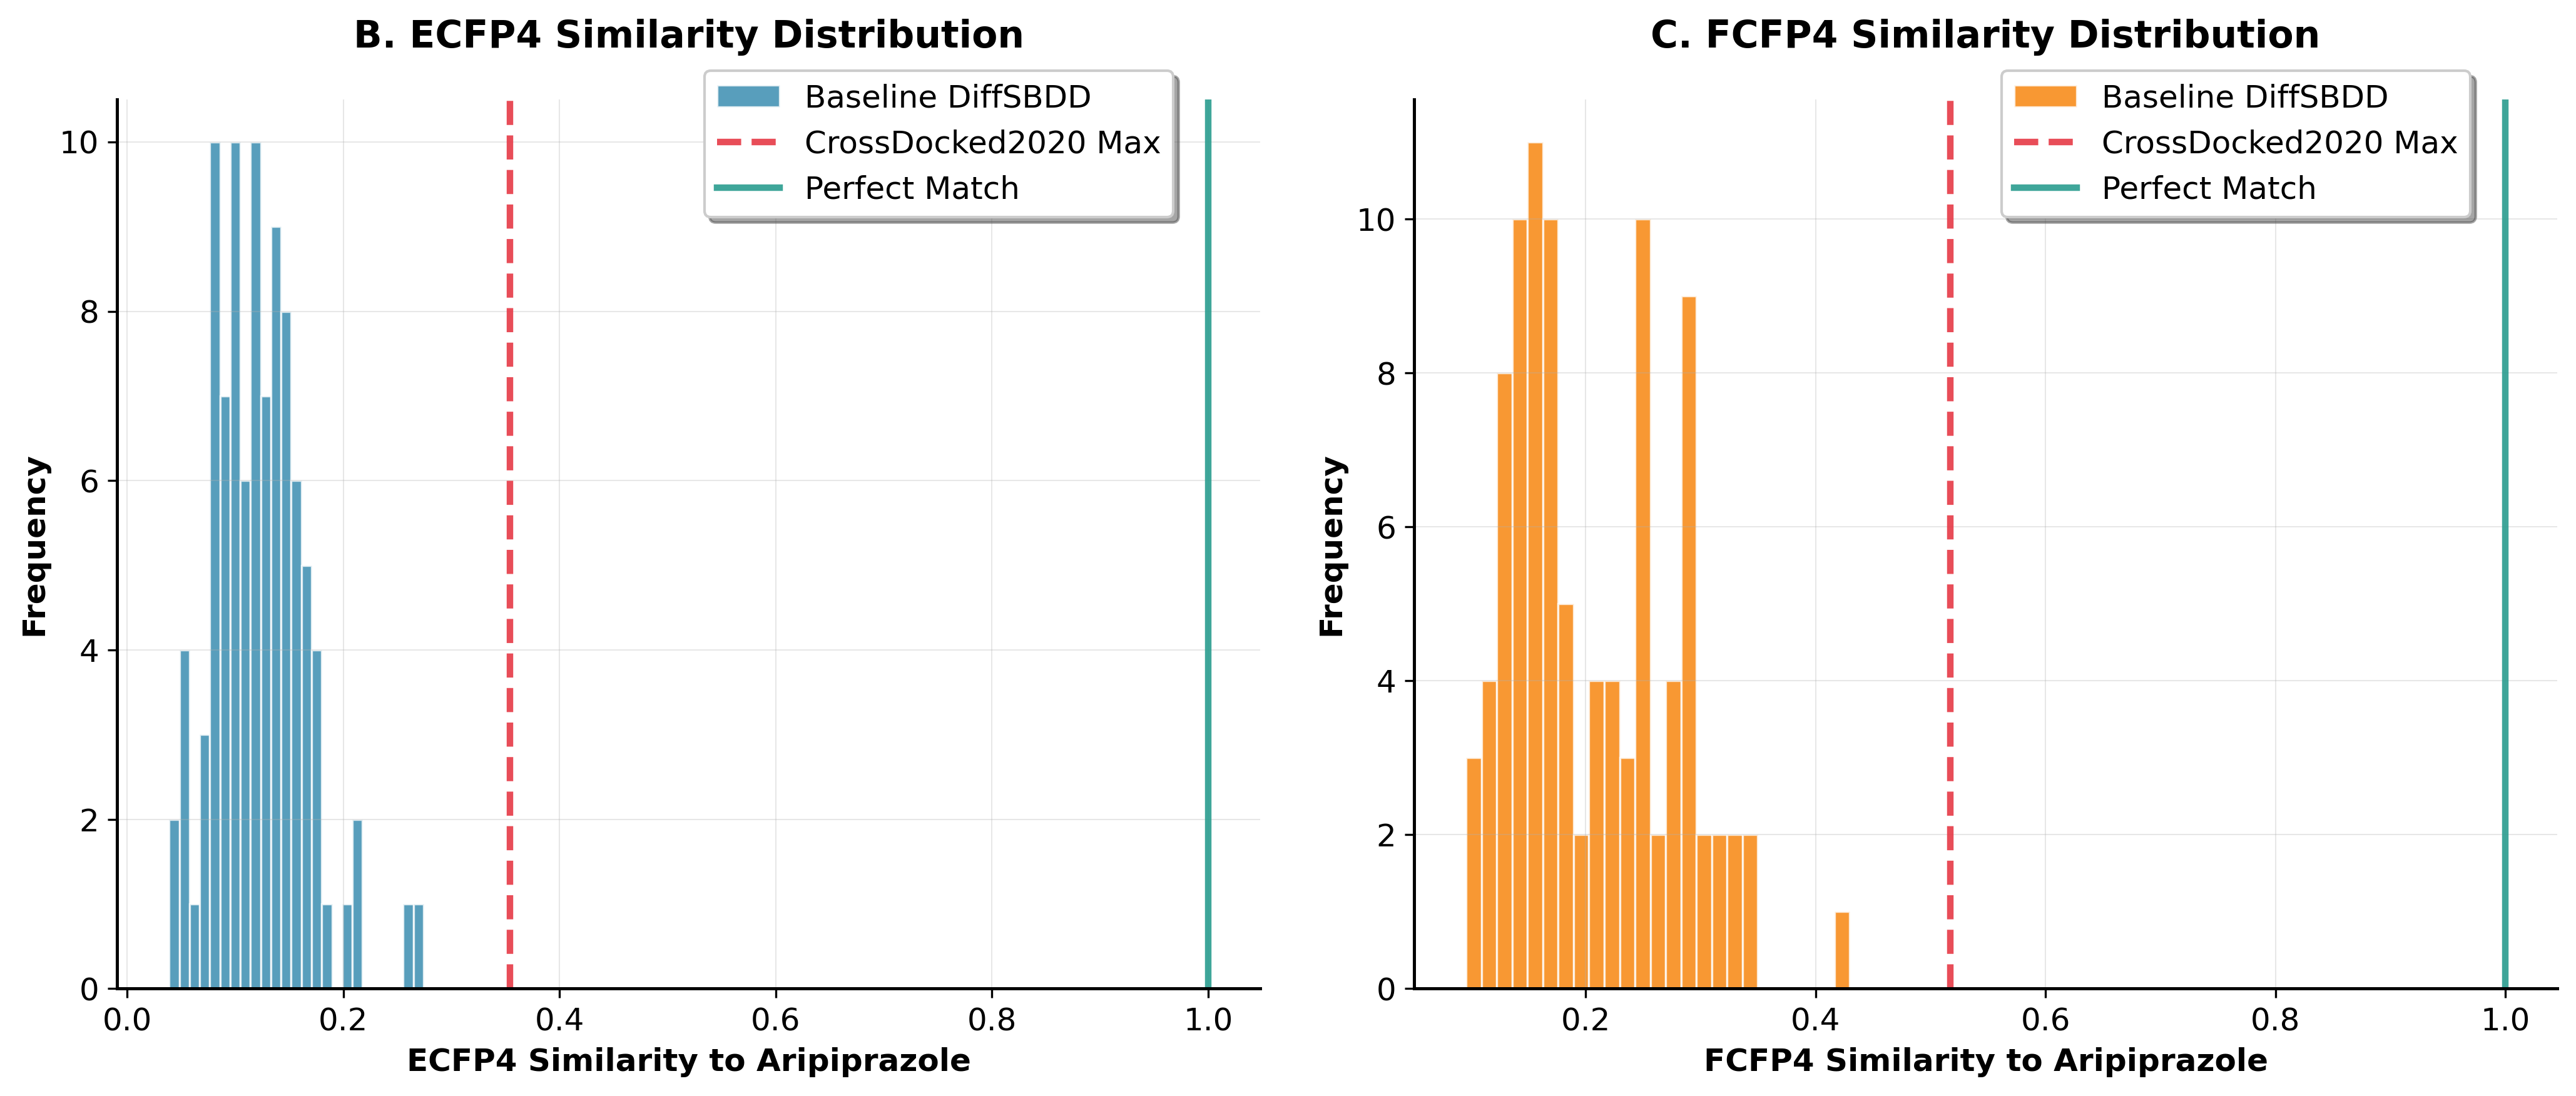

In [91]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator, DataStructs
import matplotlib.pyplot as plt
import numpy as np

# Set high-quality figure parameters
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.2

def combine_sdfs(sdf_paths, output_path=None):
    """Combine multiple SDF files into one list of molecules"""
    all_mols = []
    
    for sdf_path in sdf_paths:
        supplier = Chem.SDMolSupplier(sdf_path)
        for mol in supplier:
            if mol is not None:
                all_mols.append(mol)
    
    if output_path:
        writer = Chem.SDWriter(output_path)
        for mol in all_mols:
            writer.write(mol)
        writer.close()
    
    return all_mols

def calculate_fingerprint_similarities(mols, ref_mol):
    """Calculate both ECFP4 and FCFP4 similarities"""
    # ECFP4 (Morgan radius=2)
    ecfp_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2)
    
    # FCFP4 (Morgan with atom features, radius=2)
    atom_invariants_generator = rdFingerprintGenerator.GetMorganFeatureAtomInvGen()
    fcfp_generator = rdFingerprintGenerator.GetMorganGenerator(
        radius=2,
        atomInvariantsGenerator=atom_invariants_generator
    )
    
    ecfp_similarities = []
    fcfp_similarities = []
    
    ref_ecfp = ecfp_generator.GetCountFingerprint(ref_mol)
    ref_fcfp = fcfp_generator.GetCountFingerprint(ref_mol)
    
    for mol in mols:
        if mol is not None:
            # ECFP4
            mol_ecfp = ecfp_generator.GetCountFingerprint(mol)
            ecfp_sim = DataStructs.TanimotoSimilarity(mol_ecfp, ref_ecfp)
            ecfp_similarities.append(ecfp_sim)
            
            # FCFP4
            mol_fcfp = fcfp_generator.GetCountFingerprint(mol)
            fcfp_sim = DataStructs.TanimotoSimilarity(mol_fcfp, ref_fcfp)
            fcfp_similarities.append(fcfp_sim)
    
    return ecfp_similarities, fcfp_similarities

# Load and combine your SDFs
sdfs = ["data/original_diffsbdd/7e2z_test_30_nodes_2.sdf",
        "data/original_diffsbdd/7e2z_test_30_nodes.sdf"]

baseline_mols = combine_sdfs(sdfs)

# Load aripiprazole reference
aripiprazole = Chem.MolFromSmiles("C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=CC=C4)Cl)Cl")

# Calculate similarities
ecfp4_sims, fcfp4_sims = calculate_fingerprint_similarities(baseline_mols, aripiprazole)

# Create improved histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# ECFP4 histogram
n1, bins1, patches1 = ax1.hist(ecfp4_sims, bins=25, alpha=0.8, color='#2E86AB', 
                               edgecolor='white', linewidth=0.8, label='Baseline DiffSBDD')
ax1.axvline(x=0.354, color='#E63946', linestyle='--', linewidth=2.5, 
           label='CrossDocked2020 Max', alpha=0.9)
ax1.axvline(x=1.0, color='#2A9D8F', linestyle='-', linewidth=2.5, 
           label='Perfect Match', alpha=0.9)
ax1.set_xlabel('ECFP4 Similarity to Aripiprazole', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('B. ECFP4 Similarity Distribution', fontweight='bold', pad=20)
ax1.legend(frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(0.5, 0.95), loc='center left')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# FCFP4 histogram
n2, bins2, patches2 = ax2.hist(fcfp4_sims, bins=25, alpha=0.8, color='#F77F00', 
                               edgecolor='white', linewidth=0.8, label='Baseline DiffSBDD')
ax2.axvline(x=0.517, color='#E63946', linestyle='--', linewidth=2.5, 
           label='CrossDocked2020 Max', alpha=0.9)
ax2.axvline(x=1.0, color='#2A9D8F', linestyle='-', linewidth=2.5, 
           label='Perfect Match', alpha=0.9)

ax2.set_xlabel('FCFP4 Similarity to Aripiprazole', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('C. FCFP4 Similarity Distribution', fontweight='bold', pad=20)
ax2.legend(frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(0.5, 0.95), loc='center left')

ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
# Print statistics
print(f"\n=== Similarity Analysis ===")
print(f"ECFP4 - Mean: {np.mean(ecfp4_sims):.3f}, Max: {np.max(ecfp4_sims):.3f}, Std: {np.std(ecfp4_sims):.3f}")
print(f"FCFP4 - Mean: {np.mean(fcfp4_sims):.3f}, Max: {np.max(fcfp4_sims):.3f}, Std: {np.std(fcfp4_sims):.3f}")

# Optional: Save the figure
plt.savefig('data/aripiprazole_similarity/aripiprazole_similarity_distributions_ecfp4_fcfp4_7e2z.png', dpi=300, bbox_inches='tight')

plt.show()


In [109]:
from rdkit import Chem
from rdkit.Chem import Draw, rdDepictor

# Define molecules
m_max_fcfp4 = "[H]c1c([H])c(OC([H])([H])C(=O)N([H])c2c([H])c([H])c(C([H])([H])N3C([H])([H])C([H])([H])C([H])([H])C([H])([H])C3([H])[H])c([H])c2[H])c(Cl)c([H])c1Cl"
mol_fcfp4 = Chem.MolFromSmiles(m_max_fcfp4)

m_max_ecfp4 = "[H]c1c([H])c(OC([H])([H])C([H])([H])C([H])([H])C([H])([H])N2C([H])([H])C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c2c(c1[H])C(=O)N([H])C([H])([H])C2([H])[H]"
mol_ecfp4 = Chem.MolFromSmiles(m_max_ecfp4)

aripiprazole = Chem.MolFromSmiles("C1CC(=O)NC2=C1C=CC(=C2)OCCCCN3CCN(CC3)C4=C(C(=CC=C4)Cl)Cl")

# Standardize molecular orientations
for mol in [mol_ecfp4, mol_fcfp4, aripiprazole]:
    rdDepictor.Compute2DCoords(mol)

# Create grid with labels
legends = [
    "Max ECFP4 - 0.354 - PDB: 4TK0 ",
    "Max FCFP4 - 0.517 - PDB: 5FOQ ", 
    "Aripiprazole - Reference - 7E2Z"
]

img = Draw.MolsToGridImage(
    [mol_ecfp4, mol_fcfp4, aripiprazole],
    legends=legends,
    molsPerRow=3,
    subImgSize=(400, 400),
    useSVG=False,
    returnPNG=True
)
with open('molecular_comparison_grid.png', 'wb') as f:
    f.write(img.data)

print("High-quality PNG grid created: molecular_comparison_grid.png")

High-quality PNG grid created: molecular_comparison_grid.png


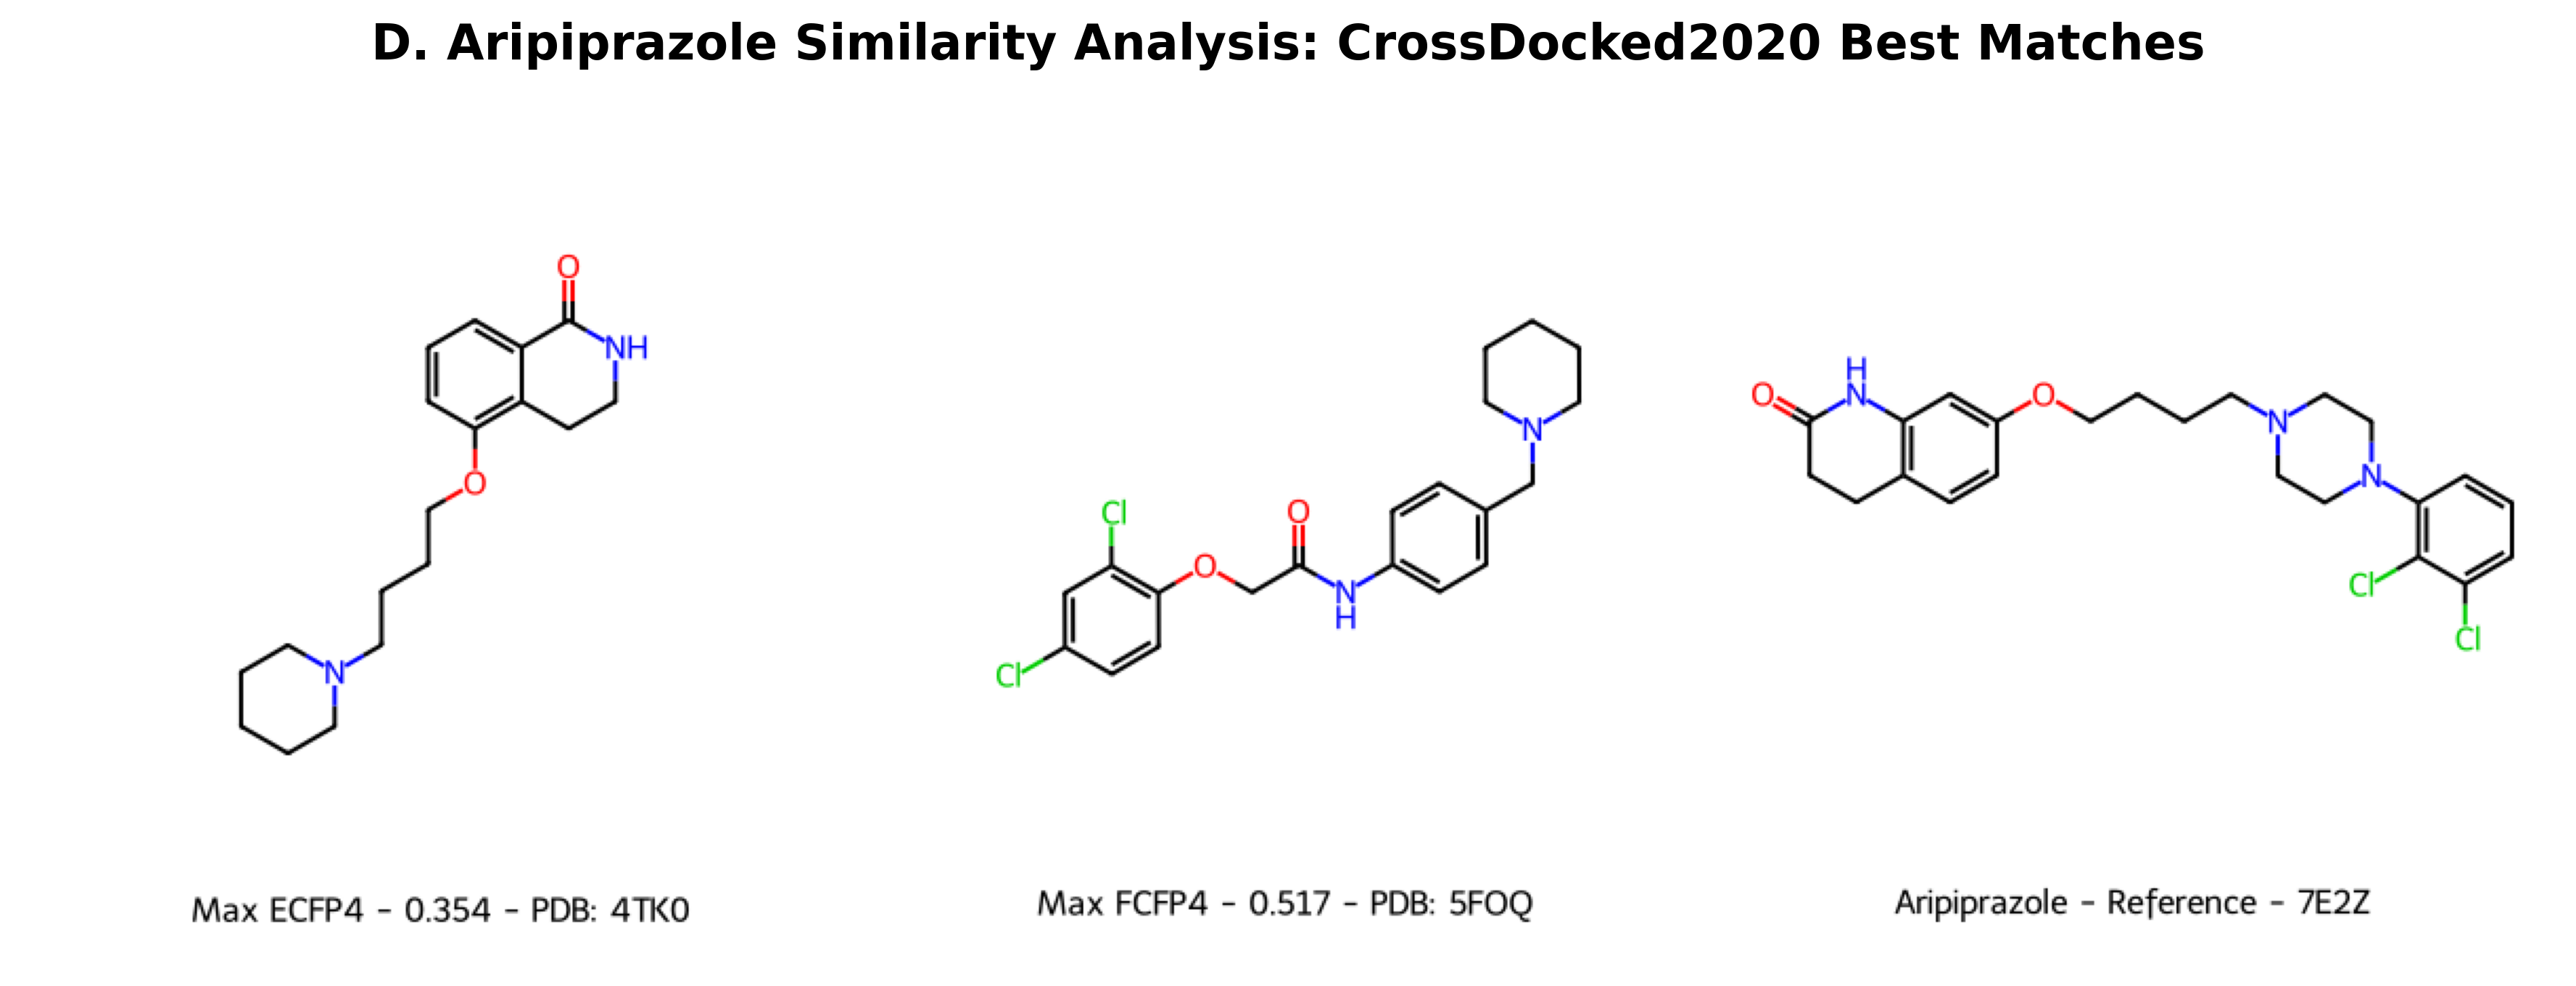

In [111]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create your molecular grid first (your existing code)
img_data = Draw.MolsToGridImage(
    [mol_ecfp4, mol_fcfp4, aripiprazole],
    legends=legends,
    molsPerRow=3,
    subImgSize=(400, 400),
    useSVG=False,
    returnPNG=True
)

# Convert to PIL Image
img = Image.open(io.BytesIO(img_data.data))

# Create matplotlib figure with title
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(img)
ax.set_title('D. Aripiprazole Similarity Analysis: CrossDocked2020 Best Matches', 
             fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.savefig('molecular_comparison_grid.png', dpi=300, bbox_inches='tight')
plt.show()

[20:14:25] Explicit valence for atom # 9 N, 4, is greater than permitted
[20:14:25] ERROR: Could not sanitize molecule ending on line 2929
[20:14:25] ERROR: Explicit valence for atom # 9 N, 4, is greater than permitted
[20:14:25] Explicit valence for atom # 19 N, 4, is greater than permitted
[20:14:25] ERROR: Could not sanitize molecule ending on line 5067
[20:14:25] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNING: please use MorganGenerator
[20:14:25] DEPRECATION WARNIN

Saved CSV to fcfp4_similarity_7e2z_diffsbdd_prism.csv
FCFP4 summary
PRISM   : {'n': 100, 'mean': 0.1542235037737389, 'median': 0.15110004151100043, 'q25': 0.11745607333842628, 'q75': 0.1895109395109395}
DiffSBDD: {'n': 98, 'mean': 0.13178900524970508, 'median': 0.12224989622249896, 'q25': 0.0866898148148148, 'q75': 0.1722077922077922}
FCFP4 ≥ 0.30  PRISM=0.020  DiffSBDD=0.010  Δ=+0.010
FCFP4 ≥ 0.40  PRISM=0.010  DiffSBDD=0.000  Δ=+0.010
FCFP4 ≥ 0.50  PRISM=0.000  DiffSBDD=0.000  Δ=+0.000


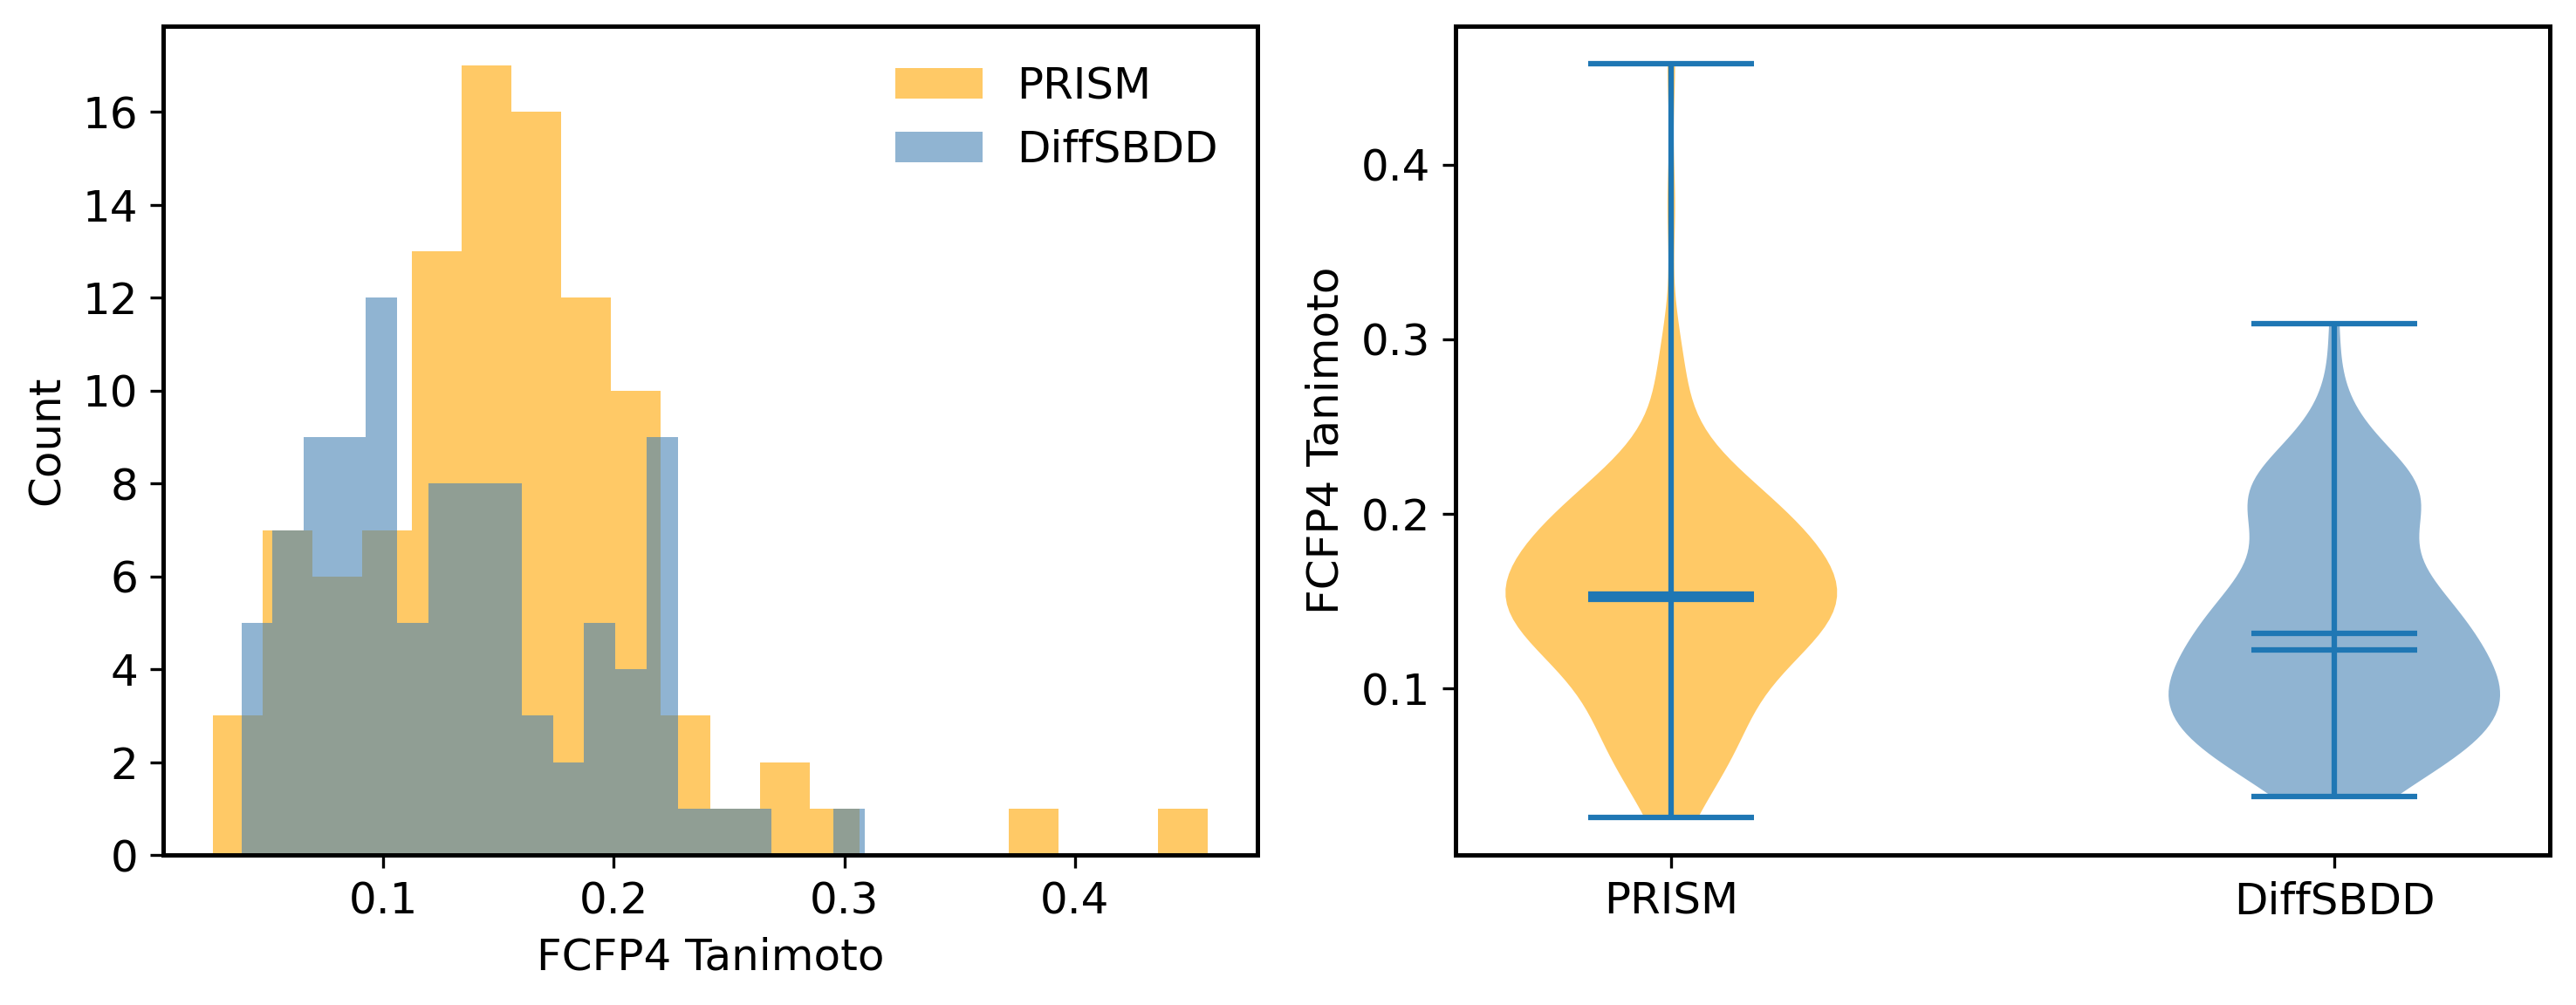

Mann–Whitney FCFP4: MannwhitneyuResult(statistic=np.float64(5918.0), pvalue=np.float64(0.0116011556675172))


In [132]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import rdMolDescriptors

# ---------- paths ----------
REF_SDF   = "data/sucos_aripip_lr1e-5_ema_mean/epoch_0000/epoch0_data_drd2_strucutres_processed_ligand_free_pockets_drd2_7e2z_E_9SC_pocket_only.pdb_data_drd2_strucutres_7e2z_E_9SC_lig0_ref.sdf"
DIFF_SDF  = "data/original_diffsbdd/7e2z_test_30_nodes_100.sdf"
PRISM_SDF = "data/sucos_aripip_lr1e-5_ema_mean/test_time_last_ckpt_gen_100_30nodes/SuCOS_7e2z_centered_lr_1e-5_clip_0.1_30_nodes.sdf"
OUT_CSV   = "fcfp4_similarity_7e2z_diffsbdd_prism.csv"
# ----------------------------

COLOR_PRISM = "orange"
COLOR_DIFF  = "steelblue"

def load_single_mol(path, removeHs=False):
    m = Chem.MolFromMolFile(path, removeHs=removeHs, sanitize=True)
    if m is None:
        supp = Chem.SDMolSupplier(path, removeHs=removeHs, sanitize=True)
        for x in supp:
            if x is not None:
                m = x
                break
    if m is None:
        raise ValueError(f"Could not read molecule from {path}")
    return m

def load_many(path, removeHs=False):
    supp = Chem.SDMolSupplier(path, removeHs=removeHs, sanitize=True)
    return [m for m in supp if m is not None]

def fcfp4_fp(mol, nBits=2048):
    return rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=nBits, useFeatures=True)

def tanimoto(fp1, fp2):
    return DataStructs.TanimotoSimilarity(fp1, fp2)

# Load data
ref = load_single_mol(REF_SDF, removeHs=False)
diff_mols  = load_many(DIFF_SDF,  removeHs=False)
prism_mols = load_many(PRISM_SDF, removeHs=False)

# Reference FCFP4
ref_fcfp = fcfp4_fp(ref)

rows = []
def score_set(tag, mols):
    for i, m in enumerate(mols):
        try:
            fp = fcfp4_fp(m)
            s_fc = tanimoto(ref_fcfp, fp)
            rows.append((tag, i, s_fc))
        except Exception:
            rows.append((tag, i, np.nan))

# PRISM first, then DiffSBDD
score_set("PRISM", prism_mols)
score_set("DiffSBDD", diff_mols)

df = pd.DataFrame(rows, columns=["set","idx","FCFP4"])
df.to_csv(OUT_CSV, index=False)
print(f"Saved CSV to {OUT_CSV}")

def summarize(series):
    v = series.dropna().values
    return dict(n=len(v),
                mean=float(np.mean(v)),
                median=float(np.median(v)),
                q25=float(np.quantile(v, 0.25)),
                q75=float(np.quantile(v, 0.75)))

print("FCFP4 summary")
print("PRISM   :", summarize(df[df["set"]=="PRISM"]["FCFP4"]))
print("DiffSBDD:", summarize(df[df["set"]=="DiffSBDD"]["FCFP4"]))

# Success fractions
for thr in [0.3, 0.4, 0.5]:
    p = np.mean(df.loc[df["set"]=="PRISM","FCFP4"]    >= thr)
    d = np.mean(df.loc[df["set"]=="DiffSBDD","FCFP4"] >= thr)
    print(f"FCFP4 ≥ {thr:.2f}  PRISM={p:.3f}  DiffSBDD={d:.3f}  Δ={p-d:+.3f}")

# Plots
def violin(ax, data, labels, ylabel):
    parts = ax.violinplot(data, showmeans=True, showmedians=True)
    for pc, color in zip(parts['bodies'], [COLOR_PRISM, COLOR_DIFF]):
        pc.set_facecolor(color)
        pc.set_alpha(0.6)
    ax.set_xticks(range(1, len(labels)+1))
    ax.set_xticklabels(labels)
    ax.set_ylabel(ylabel)

def two_hist(ax, prism_vals, diff_vals, xlabel, bins=20):
    ax.hist(prism_vals, bins=bins, alpha=0.6, color=COLOR_PRISM, label="PRISM")
    ax.hist(diff_vals,  bins=bins, alpha=0.6, color=COLOR_DIFF,  label="DiffSBDD")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Count")
    ax.legend(frameon=False)

fc_prism = df[df["set"]=="PRISM"]["FCFP4"].dropna().values
fc_diff  = df[df["set"]=="DiffSBDD"]["FCFP4"].dropna().values

fig, axes = plt.subplots(1, 2, figsize=(10,4))
two_hist(axes[0], fc_prism, fc_diff, "FCFP4 Tanimoto", bins=20)
violin(axes[1], [fc_prism, fc_diff], ["PRISM","DiffSBDD"], "FCFP4 Tanimoto")

plt.tight_layout()
plt.show()

# Optional significance test
try:
    from scipy.stats import mannwhitneyu
    u_fc = mannwhitneyu(fc_prism, fc_diff, alternative="two-sided")
    print("Mann–Whitney FCFP4:", u_fc)
except Exception:
    print("SciPy not available, skipping test.")
